In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

In [2]:
request_header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36'}

In [3]:
title = []
current_price = []
rating = []
reviews_ratings = []
brand = []
capacity = []
auto_type = []
load_type = []
original_price = []
discount = []
warranty_on_product = [] 
rpm = []
for i in range(1,30): # Pages
    url = f"https://www.flipkart.com/search?q=washing+machine&page={i}" # Main Link
    # print(url)
    page = requests.get(url,headers = request_header)
    soup = BeautifulSoup(page.text)
    for j in soup.find_all("a",class_="CGtC98"):
        url1 = f"https://www.flipkart.com{j.get('href')}" # Product Wise Loop
        # print("product Wise",url1)
        page = requests.get(url1,headers = request_header)
        soup1 = BeautifulSoup(page.text)
        container = soup1.find("div",class_="C7fEHH")
        #Rating
        if container:
            r = container.find("div",class_="XQDdHH")
            if r:
                rating.append(r.text)
            else:
                rating.append(np.nan)
        else:
            rating.append(np.nan)
        # Reviews and Ratings
        if container:
            r_r = container.find("span",class_="Wphh3N")
            if r_r:
                reviews_ratings.append(r_r.text)
            else:
                reviews_ratings.append(np.nan)
        else:
            reviews_ratings.append(np.nan)
        #r_r = soup1.find("div",class_="ISksQ2")
        #if r_r:
            #rr1 = r_r.find("span",class_="Wphh3N")
            #if rr1:
                #reviews_ratings.append(rr1.text)
            #else:
                #reviews_ratings.append(np.nan)
        #else:
            #reviews_ratings.append(np.nan)
        #Title
        if container:
            tit = container.find("span",class_="VU-ZEz")
            if tit:
                title.append(tit.text)
            else:
                title.append(np.nan)
        else:
            title.append(np.nan)
        # Capacity
        if container:
            tit = container.find("span",class_="VU-ZEz")
            if tit:
                cap = re.findall(r"(\d+(?:\.\d+)?(?:/\d+(?:\.\d+)?)?)\s*(?:kg|Kg)?",tit.text)
                if cap:
                    capacity.append(cap[0])
                else:
                    capacity.append(np.nan)
            else:
                capacity.append(np.nan)
        else:
            capacity.append(np.nan)
        #Automation Type
        if container:
            tit = container.find("span",class_="VU-ZEz")
            if tit:
                a_t = re.findall(r"(?:Semi Automatic|Fully Automatic)",tit.text)
                if a_t:
                    auto_type.append(a_t)
                else:
                    auto_type.append(np.nan)
            else:
                auto_type.append(np.nan)
        else:
            auto_type.append(np.nan)
        # Load Type
        if container:
            tit = container.find("span",class_="VU-ZEz")
            if tit:
                l_t = re.findall(r"(?:Top Load|Front Load)",tit.text)
                if l_t:
                    load_type.append(l_t)
                else:
                    load_type.append(np.nan)
            else:
                load_type.append(np.nan)
        else:
            load_type.append(np.nan)
        #Current Price
        if container:
            cp = container.find("div",class_="Nx9bqj CxhGGd")
            if cp:
                current_price.append(cp.text)
            else:
                current_price.append(np.nan)
        else:
            current_price.append(np.nan)
        #original Price
        if container:
            op = container.find("div",class_="yRaY8j A6+E6v")
            if op:
                original_price.append(op.text)
            else:
                original_price.append(np.nan)
        else:
            original_price.append(np.nan)
        #discount
        if container:
            dis = container.find("div",class_="UkUFwK WW8yVX")
            if dis:
                discount.append(dis.text)
            else:
                discount.append(np.nan)
        else:
            discount.append(np.nan)
        # Brand
        if container:
            tit = container.find("span",class_="VU-ZEz")
            if tit:
                b = re.findall(r"^([A-Za-z]+(?:\s[A-Za-z]+|\s*\+\w+|\s*\(.*?\)){0,11})\s+\d+(?:\.\d+)?(?:/\d+(?:\.\d+)?)?\s*(?:kg|Kg)?",tit.text)
                if b:
                    brand.append(b)
                else:
                    brand.append(np.nan)
            else:
                brand.append(np.nan)
        else:
            brand.append(np.nan)
        #warranty on product
        w = soup1.find("div",class_="zIL+eP")
        if w:
            w1 = re.findall(r"^(\d+)", w.text)
            if w1:
                warranty_on_product.append(w1)
            else:
                warranty_on_product.append(np.nan)
        else:
            warranty_on_product.append(np.nan)
        #rpm
        rev_r = soup1.find("div", class_="xFVion")   # only first match
        if rev_r:
            rpm1 = re.findall(r"(\d+)\s(?:rpm|RPM)", rev_r.text)
            if rpm1:
                rpm.append(rpm1[0])
            else:
                rpm.append(np.nan)
        else:
             rpm.append(np.nan)

        

In [4]:
print(len(rating))
print(len(reviews_ratings))
print(len(title))
print(len(capacity))
print(len(auto_type))
print(len(load_type))
print(len(current_price))
print(len(original_price))
print(len(discount))
print(len(brand))
print(len(warranty_on_product))
print(len(rpm))

696
696
696
696
696
696
696
696
696
696
696
696


In [5]:
dictionary = {"Title":title,"Brand":brand,"Capacity":capacity,"Automation_Type":auto_type,"Load_Type":load_type,"Current_Price":current_price,
              "Original_Price":original_price,"Rating":rating,
              "Reviews and Ratings":reviews_ratings,"RPM":rpm,"Warranty_on_Product":warranty_on_product,"Discount":discount}
df = pd.DataFrame(dictionary)
df.head()

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,Reviews and Ratings,RPM,Warranty_on_Product,Discount
0,Whirlpool 7 kg Magic Clean 5 Star Fully Automa...,[Whirlpool],7,[Fully Automatic],[Top Load],"₹14,490","₹19,550",4.1,"39,864 Ratings & 2,579 Reviews",740,[2],25% off
1,InnoQ 7.5 kg | Turbo Wash | Buzzer | Wheels | ...,[InnoQ],7.5,[Semi Automatic],[Top Load],"₹6,989","₹18,990",4.2,"2,371 Ratings & 312 Reviews",1500,[1],63% off
2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,[realme TechLife],7.5,[Semi Automatic],[Top Load],"₹8,090","₹13,990",4.2,"87,253 Ratings & 7,731 Reviews",1400,[2],42% off
3,Thomson 7.5 kg 5 Star Aqua Magic Semi Automati...,[Thomson],7.5,[Semi Automatic],[Top Load],"₹7,490","₹11,499",4.1,"26,163 Ratings & 2,243 Reviews",1400,[2],34% off
4,"LG 7 kg 5 Star with Wind Jet Dry, Collar Scrub...",[LG],7,[Semi Automatic],[Top Load],"₹10,490","₹16,390",4.5,"47,022 Ratings & 2,945 Reviews",1350,[2],35% off


In [8]:
df

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,Reviews and Ratings,RPM,Warranty_on_Product,Discount
0,Whirlpool 7 kg Magic Clean 5 Star Fully Automa...,[Whirlpool],7,[Fully Automatic],[Top Load],"₹14,490","₹19,550",4.1,"39,864 Ratings & 2,579 Reviews",740,[2],25% off
1,InnoQ 7.5 kg | Turbo Wash | Buzzer | Wheels | ...,[InnoQ],7.5,[Semi Automatic],[Top Load],"₹6,989","₹18,990",4.2,"2,371 Ratings & 312 Reviews",1500,[1],63% off
2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,[realme TechLife],7.5,[Semi Automatic],[Top Load],"₹8,090","₹13,990",4.2,"87,253 Ratings & 7,731 Reviews",1400,[2],42% off
3,Thomson 7.5 kg 5 Star Aqua Magic Semi Automati...,[Thomson],7.5,[Semi Automatic],[Top Load],"₹7,490","₹11,499",4.1,"26,163 Ratings & 2,243 Reviews",1400,[2],34% off
4,Whirlpool 8 kg Fully Automatic Top Load Washin...,[Whirlpool],8,[Fully Automatic],[Top Load],"₹17,690","₹26,500",4.1,"39,864 Ratings & 2,579 Reviews",740,[2],33% off
...,...,...,...,...,...,...,...,...,...,...,...,...
691,Whirlpool 7.5 kg Magic Clean 5 Star Fully Auto...,[Whirlpool],7.5,[Fully Automatic],[Top Load],"₹17,140","₹19,750",4.2,"24,354 Ratings & 1,654 Reviews",740,[2],13% off
692,CANDY 7 kg Semi Automatic Top Load Washing Mac...,[CANDY],7,[Semi Automatic],[Top Load],"₹8,890","₹11,590",4.2,823 Ratings & 89 Reviews,1300,[2],23% off
693,"IFB 8 kg Powered by AI, 5 Star,� with 2x Steam...",[IFB],8,[Fully Automatic],[Front Load],"₹39,350","₹50,690",4.4,"1,982 Ratings & 201 Reviews",1400,[4],22% off
694,Samsung 10 kg with Wi-Fi Enabled Fully Automat...,[Samsung],10,[Fully Automatic],[Top Load],"₹31,538","₹37,000",4.3,"24,714 Ratings & 1,975 Reviews",700,[2],14% off


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                694 non-null    object
 1   Brand                694 non-null    object
 2   Capacity             694 non-null    object
 3   Automation_Type      660 non-null    object
 4   Load_Type            660 non-null    object
 5   Current_Price        694 non-null    object
 6   Original_Price       684 non-null    object
 7   Rating               669 non-null    object
 8   Reviews and Ratings  669 non-null    object
 9   RPM                  692 non-null    object
 10  Warranty_on_Product  690 non-null    object
 11  Discount             684 non-null    object
dtypes: object(12)
memory usage: 65.4+ KB


In [7]:
df.isnull().sum()

Title                   2
Brand                   2
Capacity                2
Automation_Type        36
Load_Type              36
Current_Price           2
Original_Price         12
Rating                 27
Reviews and Ratings    27
RPM                     4
Warranty_on_Product     6
Discount               12
dtype: int64

In [8]:
df[df["Brand"].isna()]

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,Reviews and Ratings,RPM,Warranty_on_Product,Discount
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df[df["Automation_Type"].isna()]

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,Reviews and Ratings,RPM,Warranty_on_Product,Discount
10,InnoQ 8.5 kg | Turbo Wash | Magic Filter | Lin...,[InnoQ],8.5,NaN,NaN,"₹5,185","₹14,990",4,198 Ratings & 23 Reviews,1350,[1],65% off
43,Voltas Beko by A Tata Product 7.5 kg Washer on...,[Voltas Beko by A Tata Product],7.5,NaN,NaN,"₹5,196","₹7,490",4.1,"2,579 Ratings & 185 Reviews",700,[1],30% off
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,ONIDA 6.5 kg Washer only Red (WS65WLPT1LR),[ONIDA],6.5,NaN,NaN,"₹5,800",NaN,4.2,"30,453 Ratings & 3,229 Reviews",780,[1],NaN
70,InnoQ 8.5 kg | Turbo Wash | Magic Filter | Lin...,[InnoQ],8.5,NaN,NaN,"₹5,185","₹14,990",4,198 Ratings & 23 Reviews,1350,[1],65% off
86,InnoQ 8.5 kg | Turbo Wash | Magic Filter | Lin...,[InnoQ],8.5,NaN,NaN,"₹5,185","₹14,990",4,198 Ratings & 23 Reviews,1350,[1],65% off
140,InnoQ 8.5 kg | Turbo Wash | Magic Filter | Lin...,[InnoQ],8.5,NaN,NaN,"₹5,185","₹14,990",4,198 Ratings & 23 Reviews,1350,[1],65% off
151,InnoQ 8.5 kg | Turbo Wash | Magic Filter | Lin...,[InnoQ],8.5,NaN,NaN,"₹5,185","₹14,990",4,198 Ratings & 23 Reviews,1350,[1],65% off
153,"ONIDA 9 kg Washer only White, Maroon (LILIPUT...",[ONIDA],9,NaN,NaN,"₹6,397","₹6,999",4.2,"30,453 Ratings & 3,229 Reviews",780,[1],8% off
158,Voltas Beko by A Tata Product 7.5 kg Washer on...,[Voltas Beko by A Tata Product],7.5,NaN,NaN,"₹5,196","₹7,490",4.1,"2,579 Ratings & 185 Reviews",700,[1],30% off


In [10]:
df[df["Load_Type"].isna()]

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,Reviews and Ratings,RPM,Warranty_on_Product,Discount
10,InnoQ 8.5 kg | Turbo Wash | Magic Filter | Lin...,[InnoQ],8.5,NaN,NaN,"₹5,185","₹14,990",4,198 Ratings & 23 Reviews,1350,[1],65% off
43,Voltas Beko by A Tata Product 7.5 kg Washer on...,[Voltas Beko by A Tata Product],7.5,NaN,NaN,"₹5,196","₹7,490",4.1,"2,579 Ratings & 185 Reviews",700,[1],30% off
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,ONIDA 6.5 kg Washer only Red (WS65WLPT1LR),[ONIDA],6.5,NaN,NaN,"₹5,800",NaN,4.2,"30,453 Ratings & 3,229 Reviews",780,[1],NaN
70,InnoQ 8.5 kg | Turbo Wash | Magic Filter | Lin...,[InnoQ],8.5,NaN,NaN,"₹5,185","₹14,990",4,198 Ratings & 23 Reviews,1350,[1],65% off
86,InnoQ 8.5 kg | Turbo Wash | Magic Filter | Lin...,[InnoQ],8.5,NaN,NaN,"₹5,185","₹14,990",4,198 Ratings & 23 Reviews,1350,[1],65% off
140,InnoQ 8.5 kg | Turbo Wash | Magic Filter | Lin...,[InnoQ],8.5,NaN,NaN,"₹5,185","₹14,990",4,198 Ratings & 23 Reviews,1350,[1],65% off
151,InnoQ 8.5 kg | Turbo Wash | Magic Filter | Lin...,[InnoQ],8.5,NaN,NaN,"₹5,185","₹14,990",4,198 Ratings & 23 Reviews,1350,[1],65% off
153,"ONIDA 9 kg Washer only White, Maroon (LILIPUT...",[ONIDA],9,NaN,NaN,"₹6,397","₹6,999",4.2,"30,453 Ratings & 3,229 Reviews",780,[1],8% off
158,Voltas Beko by A Tata Product 7.5 kg Washer on...,[Voltas Beko by A Tata Product],7.5,NaN,NaN,"₹5,196","₹7,490",4.1,"2,579 Ratings & 185 Reviews",700,[1],30% off


In [11]:
df[df["Original_Price"].isna()]

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,Reviews and Ratings,RPM,Warranty_on_Product,Discount
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,ONIDA 6.5 kg Washer only Red (WS65WLPT1LR),[ONIDA],6.5,NaN,NaN,"₹5,800",NaN,4.2,"30,453 Ratings & 3,229 Reviews",780,[1],NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,"Samsung 12 kg 5 Star, AI Wash, Ecobubble, AI E...",[Samsung],12,[Fully Automatic],[Top Load],"₹42,550",NaN,4.3,"93,102 Ratings & 6,107 Reviews",700,[2],NaN
254,"Samsung 12 kg 5 Star, AI Wash, Ecobubble, AI E...",[Samsung],12,[Fully Automatic],[Top Load],"₹42,550",NaN,4.3,"93,102 Ratings & 6,107 Reviews",700,[2],NaN
275,"ONIDA 7 kg Washer only White, Maroon (Liliput)",[ONIDA],7,NaN,NaN,"₹5,850",NaN,4.2,"30,453 Ratings & 3,229 Reviews",780,[1],NaN
408,MarQ by Flipkart 6.5 kg Semi Automatic Top Loa...,[MarQ by Flipkart],6.5,[Semi Automatic],[Top Load],"₹11,299",NaN,4.3,"7,015 Ratings & 1,004 Reviews",1350,[2],NaN
549,Admiral 6.5 kg Semi Automatic Top Load Washing...,[Admiral],6.5,[Semi Automatic],[Top Load],"₹8,999",NaN,4.2,182 Ratings & 12 Reviews,1350,[3],NaN
579,Admiral 8.5 kg Semi Automatic Top Load Washing...,[Admiral],8.5,[Semi Automatic],[Top Load],"₹12,649",NaN,4.2,182 Ratings & 12 Reviews,1350,[3],NaN
595,MarQ by Flipkart 6.5 kg Semi Automatic Top Loa...,[MarQ by Flipkart],6.5,[Semi Automatic],[Top Load],"₹11,299",NaN,4.3,"7,015 Ratings & 1,004 Reviews",1350,[2],NaN


In [12]:
df[df["Rating"].isna()]

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,Reviews and Ratings,RPM,Warranty_on_Product,Discount
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,Godrej 8 kg Inbuilt Heater with Unbalanced Loa...,[Godrej],8,[Fully Automatic],[Top Load],"₹18,790","₹34,000",NaN,NaN,700,[2],44% off
332,Lloyd by Havells 10.5 kg Fully Automatic Top L...,[Lloyd by Havells],10.5,[Fully Automatic],[Top Load],"₹27,990","₹42,990",NaN,NaN,680,[2],34% off
333,Panasonic 7.5 kg Fully Automatic Top Load Wash...,[Panasonic],7.5,[Fully Automatic],[Top Load],"₹16,189","₹22,400",NaN,NaN,720,[2],27% off
342,Whirlpool 7 kg Fully Automatic Top Load Washin...,[Whirlpool],7,[Fully Automatic],[Top Load],"₹15,990","₹24,000",NaN,NaN,740,[3],33% off
362,Voltas Beko by A Tata Product 7 kg Fully Autom...,[Voltas Beko by A Tata Product],7,[Fully Automatic],[Top Load],"₹14,390","₹27,990",NaN,NaN,700,[3],48% off
404,Voltas Beko by A Tata Product 7 kg Fully Autom...,[Voltas Beko by A Tata Product],7,[Fully Automatic],[Front Load],"₹14,490","₹27,990",NaN,NaN,700,[1],48% off
413,Lloyd 7 kg Fully Automatic Top Load Washing Ma...,[Lloyd],7,[Fully Automatic],[Top Load],"₹15,980","₹23,990",NaN,NaN,680,[2],33% off
419,Samsung 9 kg Fully Automatic Top Load Washing ...,[Samsung],9,[Fully Automatic],[Top Load],"₹31,200","₹33,000",NaN,NaN,700,[2],5% off


In [13]:
df[df["Reviews and Ratings"].isna()]

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,Reviews and Ratings,RPM,Warranty_on_Product,Discount
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,Godrej 8 kg Inbuilt Heater with Unbalanced Loa...,[Godrej],8,[Fully Automatic],[Top Load],"₹18,790","₹34,000",NaN,NaN,700,[2],44% off
332,Lloyd by Havells 10.5 kg Fully Automatic Top L...,[Lloyd by Havells],10.5,[Fully Automatic],[Top Load],"₹27,990","₹42,990",NaN,NaN,680,[2],34% off
333,Panasonic 7.5 kg Fully Automatic Top Load Wash...,[Panasonic],7.5,[Fully Automatic],[Top Load],"₹16,189","₹22,400",NaN,NaN,720,[2],27% off
342,Whirlpool 7 kg Fully Automatic Top Load Washin...,[Whirlpool],7,[Fully Automatic],[Top Load],"₹15,990","₹24,000",NaN,NaN,740,[3],33% off
362,Voltas Beko by A Tata Product 7 kg Fully Autom...,[Voltas Beko by A Tata Product],7,[Fully Automatic],[Top Load],"₹14,390","₹27,990",NaN,NaN,700,[3],48% off
404,Voltas Beko by A Tata Product 7 kg Fully Autom...,[Voltas Beko by A Tata Product],7,[Fully Automatic],[Front Load],"₹14,490","₹27,990",NaN,NaN,700,[1],48% off
413,Lloyd 7 kg Fully Automatic Top Load Washing Ma...,[Lloyd],7,[Fully Automatic],[Top Load],"₹15,980","₹23,990",NaN,NaN,680,[2],33% off
419,Samsung 9 kg Fully Automatic Top Load Washing ...,[Samsung],9,[Fully Automatic],[Top Load],"₹31,200","₹33,000",NaN,NaN,700,[2],5% off


In [14]:
df[df["RPM"].isna()]

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,Reviews and Ratings,RPM,Warranty_on_Product,Discount
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,Whirlpool 8 kg Semi Automatic Top Load Washing...,[Whirlpool],8,[Semi Automatic],[Top Load],"₹11,885","₹15,500",4.3,310 Ratings & 20 Reviews,NaN,[2],23% off
455,DMR 3/1.5 kg Washer with Dryer Ready to Wear C...,[DMR],3/1.5,NaN,NaN,"₹5,599","₹6,499",3.5,79 Ratings & 5 Reviews,NaN,[1],13% off


In [15]:
df["Brand"] = df["Brand"].str[0]

In [16]:
df["Automation_Type"] = df["Automation_Type"].str[0]
df["Load_Type"] = df["Load_Type"].str[0]
df["Warranty_on_Product"] = df["Warranty_on_Product"].str[0]

In [17]:
df[["no_of_ratings","no_of_reviews"]] = df["Reviews and Ratings"].str.extract(r"([\d,]+)\s+Ratings.*?([\d,]+)\s+Reviews")


In [18]:
df["no_of_ratings"] = df["no_of_ratings"].str.replace(",","").astype("Int64")
df["no_of_reviews"] = df["no_of_reviews"].str.replace(",","").astype("Int64")


In [19]:
df = df.drop(columns=["Reviews and Ratings"])


In [20]:
df = df.rename(columns={
    "no_of_ratings": "No_of_Ratings",
    "no_of_reviews": "No_of_Reviews"
    
})


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                694 non-null    object
 1   Brand                694 non-null    object
 2   Capacity             694 non-null    object
 3   Automation_Type      660 non-null    object
 4   Load_Type            660 non-null    object
 5   Current_Price        694 non-null    object
 6   Original_Price       684 non-null    object
 7   Rating               669 non-null    object
 8   RPM                  692 non-null    object
 9   Warranty_on_Product  690 non-null    object
 10  Discount             684 non-null    object
 11  No_of_Ratings        669 non-null    Int64 
 12  No_of_Reviews        669 non-null    Int64 
dtypes: Int64(2), object(11)
memory usage: 72.2+ KB


In [22]:
df

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,RPM,Warranty_on_Product,Discount,No_of_Ratings,No_of_Reviews
0,Whirlpool 7 kg Magic Clean 5 Star Fully Automa...,Whirlpool,7,Fully Automatic,Top Load,"₹14,490","₹19,550",4.1,740,2,25% off,39864,2579
1,InnoQ 7.5 kg | Turbo Wash | Buzzer | Wheels | ...,InnoQ,7.5,Semi Automatic,Top Load,"₹6,989","₹18,990",4.2,1500,1,63% off,2371,312
2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,realme TechLife,7.5,Semi Automatic,Top Load,"₹8,090","₹13,990",4.2,1400,2,42% off,87253,7731
3,Thomson 7.5 kg 5 Star Aqua Magic Semi Automati...,Thomson,7.5,Semi Automatic,Top Load,"₹7,490","₹11,499",4.1,1400,2,34% off,26163,2243
4,"LG 7 kg 5 Star with Wind Jet Dry, Collar Scrub...",LG,7,Semi Automatic,Top Load,"₹10,490","₹16,390",4.5,1350,2,35% off,47022,2945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,Whirlpool 6 kg Magic Clean 5 Star and Digital ...,Whirlpool,6,Fully Automatic,Top Load,"₹14,450","₹18,200",4.2,740,2,20% off,24354,1654
692,CANDY 7 kg Semi Automatic Top Load Washing Mac...,CANDY,7,Semi Automatic,Top Load,"₹8,890","₹11,590",4.2,1300,2,23% off,823,89
693,"IFB 8 kg Powered by AI, 5 Star,� with 2x Steam...",IFB,8,Fully Automatic,Front Load,"₹39,350","₹50,690",4.4,1400,4,22% off,1982,201
694,Samsung 10 kg with Wi-Fi Enabled Fully Automat...,Samsung,10,Fully Automatic,Top Load,"₹31,538","₹37,000",4.3,700,2,14% off,24714,1975


In [65]:
df['Current_Price'] = df['Current_Price'].astype(str).str.replace('₹','').str.replace(',','')
df['Current_Price'] = pd.to_numeric(df['Current_Price'], errors='coerce').fillna(0).astype(int)
df['Original_Price'] = df['Original_Price'].astype(str).str.replace('₹','').str.replace(',','')
df['Original_Price'] = pd.to_numeric(df['Original_Price'], errors='coerce').fillna(0).astype(int)

In [66]:
df


,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,RPM,Warranty_on_Product,Discount,No_of_Ratings,No_of_Reviews
0,Whirlpool 7 kg Magic Clean 5 Star Fully Automa...,Whirlpool,7.0,Fully Automatic,Top Load,14490,19550,4.1,740,2,25% off,39864,2579
1,InnoQ 7.5 kg | Turbo Wash | Buzzer | Wheels | ...,InnoQ,7.5,Semi Automatic,Top Load,6989,18990,4.2,1500,1,63% off,2371,312
2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,realme TechLife,7.5,Semi Automatic,Top Load,8090,13990,4.2,1400,2,42% off,87253,7731
3,Thomson 7.5 kg 5 Star Aqua Magic Semi Automati...,Thomson,7.5,Semi Automatic,Top Load,7490,11499,4.1,1400,2,34% off,26163,2243
4,"LG 7 kg 5 Star with Wind Jet Dry, Collar Scrub...",LG,7.0,Semi Automatic,Top Load,10490,16390,4.5,1350,2,35% off,47022,2945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,Whirlpool 6 kg Magic Clean 5 Star and Digital ...,Whirlpool,6.0,Fully Automatic,Top Load,14450,18200,4.2,740,2,20% off,24354,1654
692,CANDY 7 kg Semi Automatic Top Load Washing Mac...,CANDY,7.0,Semi Automatic,Top Load,8890,11590,4.2,1300,2,23% off,823,89
693,"IFB 8 kg Powered by AI, 5 Star,� with 2x Steam...",IFB,8.0,Fully Automatic,Front Load,39350,50690,4.4,1400,4,22% off,1982,201
694,Samsung 10 kg with Wi-Fi Enabled Fully Automat...,Samsung,10.0,Fully Automatic,Top Load,31538,37000,4.3,700,2,14% off,24714,1975


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 695
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                694 non-null    object 
 1   Brand                694 non-null    object 
 2   Capacity             694 non-null    object 
 3   Automation_Type      694 non-null    object 
 4   Load_Type            694 non-null    object 
 5   Current_Price        694 non-null    int32  
 6   Original_Price       694 non-null    int32  
 7   Rating               694 non-null    float64
 8   RPM                  694 non-null    object 
 9   Warranty_on_Product  690 non-null    object 
 10  Discount             684 non-null    object 
 11  No_of_Ratings        669 non-null    Int64  
 12  No_of_Reviews        669 non-null    Int64  
dtypes: Int64(2), float64(1), int32(2), object(8)
memory usage: 71.8+ KB


In [68]:
#df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce').astype(float)

In [69]:
df.isnull().sum()

Title                   0
Brand                   0
Capacity                0
Automation_Type         0
Load_Type               0
Current_Price           0
Original_Price          0
Rating                  0
RPM                     0
Warranty_on_Product     4
Discount               10
No_of_Ratings          25
No_of_Reviews          25
dtype: int64

In [26]:
#df['RPM'] = pd.to_numeric(df['RPM'], errors='coerce').fillna(0).astype(int)
#df['Warranty_on_Product'] = pd.to_numeric(df['Warranty_on_Product'], errors='coerce').fillna(0).astype(int)

In [70]:
#df[df["Capacity"].isna()]

In [71]:
df[df["Title"].isna()]

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,RPM,Warranty_on_Product,Discount,No_of_Ratings,No_of_Reviews


In [72]:
df = df.dropna(subset=["Title"])


In [73]:
df.isnull().sum()

Title                   0
Brand                   0
Capacity                0
Automation_Type         0
Load_Type               0
Current_Price           0
Original_Price          0
Rating                  0
RPM                     0
Warranty_on_Product     4
Discount               10
No_of_Ratings          25
No_of_Reviews          25
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 695
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                694 non-null    object 
 1   Brand                694 non-null    object 
 2   Capacity             694 non-null    object 
 3   Automation_Type      694 non-null    object 
 4   Load_Type            694 non-null    object 
 5   Current_Price        694 non-null    int32  
 6   Original_Price       694 non-null    int32  
 7   Rating               694 non-null    float64
 8   RPM                  694 non-null    object 
 9   Warranty_on_Product  690 non-null    object 
 10  Discount             684 non-null    object 
 11  No_of_Ratings        669 non-null    Int64  
 12  No_of_Reviews        669 non-null    Int64  
dtypes: Int64(2), float64(1), int32(2), object(8)
memory usage: 71.8+ KB


In [75]:
def capacity_to_avg(val):
    if pd.isna(val):
        return None
    if '/' in str(val):
        nums = [float(x) for x in val.split('/')]
        return sum(nums) / len(nums)
    else:
        return float(val)

# Apply function
df.loc[:, 'Capacity'] = df['Capacity'].apply(capacity_to_avg)


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 695
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                694 non-null    object 
 1   Brand                694 non-null    object 
 2   Capacity             694 non-null    object 
 3   Automation_Type      694 non-null    object 
 4   Load_Type            694 non-null    object 
 5   Current_Price        694 non-null    int32  
 6   Original_Price       694 non-null    int32  
 7   Rating               694 non-null    float64
 8   RPM                  694 non-null    object 
 9   Warranty_on_Product  690 non-null    object 
 10  Discount             684 non-null    object 
 11  No_of_Ratings        669 non-null    Int64  
 12  No_of_Reviews        669 non-null    Int64  
dtypes: Int64(2), float64(1), int32(2), object(8)
memory usage: 71.8+ KB


In [77]:
df.isnull().sum()

Title                   0
Brand                   0
Capacity                0
Automation_Type         0
Load_Type               0
Current_Price           0
Original_Price          0
Rating                  0
RPM                     0
Warranty_on_Product     4
Discount               10
No_of_Ratings          25
No_of_Reviews          25
dtype: int64

In [35]:
print(df)

                                                 Title            Brand  \
0    Whirlpool 7 kg Magic Clean 5 Star Fully Automa...        Whirlpool   
1    InnoQ 7.5 kg | Turbo Wash | Buzzer | Wheels | ...            InnoQ   
2    realme TechLife 7.5 kg 5 Star Rating Semi Auto...  realme TechLife   
3    Thomson 7.5 kg 5 Star Aqua Magic Semi Automati...          Thomson   
4    LG 7 kg 5 Star with Wind Jet Dry, Collar Scrub...               LG   
..                                                 ...              ...   
691  Whirlpool 6 kg Magic Clean 5 Star and Digital ...        Whirlpool   
692  CANDY 7 kg Semi Automatic Top Load Washing Mac...            CANDY   
693  IFB 8 kg Powered by AI, 5 Star,� with 2x Steam...              IFB   
694  Samsung 10 kg with Wi-Fi Enabled Fully Automat...          Samsung   
695  BOSCH 10.5/6 kg Washer with Dryer with In-buil...            BOSCH   

    Capacity  Automation_Type   Load_Type Current_Price Original_Price Rating  \
0        7.0  Full

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 695
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                694 non-null    object 
 1   Brand                694 non-null    object 
 2   Capacity             694 non-null    object 
 3   Automation_Type      694 non-null    object 
 4   Load_Type            694 non-null    object 
 5   Current_Price        694 non-null    int32  
 6   Original_Price       694 non-null    int32  
 7   Rating               694 non-null    float64
 8   RPM                  694 non-null    object 
 9   Warranty_on_Product  690 non-null    object 
 10  Discount             684 non-null    object 
 11  No_of_Ratings        669 non-null    Int64  
 12  No_of_Reviews        669 non-null    Int64  
dtypes: Int64(2), float64(1), int32(2), object(8)
memory usage: 71.8+ KB


In [79]:
df.isnull().sum()


Title                   0
Brand                   0
Capacity                0
Automation_Type         0
Load_Type               0
Current_Price           0
Original_Price          0
Rating                  0
RPM                     0
Warranty_on_Product     4
Discount               10
No_of_Ratings          25
No_of_Reviews          25
dtype: int64

In [80]:
print(df.groupby(['Automation_Type','Load_Type']).size())


Automation_Type  Load_Type 
Fully Automatic  Front Load    160
                 Top Load      225
Semi Automatic   Top Load      309
dtype: int64


In [81]:
df[df['RPM'].isna()]

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,RPM,Warranty_on_Product,Discount,No_of_Ratings,No_of_Reviews


In [82]:
df[df['Warranty_on_Product'].isna()]

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,RPM,Warranty_on_Product,Discount,No_of_Ratings,No_of_Reviews
196,Panasonic 7 kg Fully Automatic Top Load Washin...,Panasonic,7.0,Fully Automatic,Top Load,14590,21900,4.3,700,NaN,33% off,12272,1261
211,Lloyd 8 kg Semi Automatic Top Load Washing Mac...,Lloyd,8.0,Semi Automatic,Top Load,13490,19990,4.3,1400,NaN,32% off,2840,211
282,Whirlpool 7 kg Semi Automatic Top Load Washing...,Whirlpool,7.0,Semi Automatic,Top Load,9420,14066,4.2,1400,NaN,33% off,92,5
689,DMR 3/1.5 kg Washer with Dryer Ready to Wear C...,DMR,2.25,Fully Automatic,Top Load,5599,6499,3.7,300,NaN,13% off,262,25


In [83]:
df['Brand'].mode()[0]

'Whirlpool'

In [84]:
# Fill Automation_Type per brand
df.loc[:, 'Automation_Type'] = df.groupby('Brand')['Automation_Type'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))

# Fill Load_Type per brand
df.loc[:, 'Load_Type'] = df.groupby('Brand')['Load_Type'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 695
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                694 non-null    object 
 1   Brand                694 non-null    object 
 2   Capacity             694 non-null    object 
 3   Automation_Type      694 non-null    object 
 4   Load_Type            694 non-null    object 
 5   Current_Price        694 non-null    int32  
 6   Original_Price       694 non-null    int32  
 7   Rating               694 non-null    float64
 8   RPM                  694 non-null    object 
 9   Warranty_on_Product  690 non-null    object 
 10  Discount             684 non-null    object 
 11  No_of_Ratings        669 non-null    Int64  
 12  No_of_Reviews        669 non-null    Int64  
dtypes: Int64(2), float64(1), int32(2), object(8)
memory usage: 71.8+ KB


In [86]:
df.isnull().sum()

Title                   0
Brand                   0
Capacity                0
Automation_Type         0
Load_Type               0
Current_Price           0
Original_Price          0
Rating                  0
RPM                     0
Warranty_on_Product     4
Discount               10
No_of_Ratings          25
No_of_Reviews          25
dtype: int64

In [87]:
df[df['Automation_Type'].isna()]

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,RPM,Warranty_on_Product,Discount,No_of_Ratings,No_of_Reviews


In [ ]:
# 1. See which rows are still missing
print(df[df['Automation_Type'].isna() | df['Load_Type'].isna()])

# 2. Check those brands
print(df.loc[df['Automation_Type'].isna(), 'Brand'].unique())
print(df.loc[df['Load_Type'].isna(), 'Brand'].unique())

# 3. Count how many valid values each brand has
print(df.groupby('Brand')['Automation_Type'].apply(lambda x: x.notna().sum()))
print(df.groupby('Brand')['Load_Type'].apply(lambda x: x.notna().sum()))

                                                 Title  \
44   MarQ by Flipkart by Flipkart 8 kg Washer only ...   
415  Power Guard 8.5 kg Washer only Black, Grey  (P...   
564  DMR 4.6/2 kg Washer with Dryer Ready to Wear C...   
578  DMR 4.6/2 kg Washer with Dryer Ready to Wear C...   

                            Brand  Capacity Automation_Type Load_Type  \
44   MarQ by Flipkart by Flipkart       8.0            <NA>      <NA>   
415                   Power Guard       8.5            <NA>      <NA>   
564                           DMR       3.3            <NA>      <NA>   
578                           DMR       3.3            <NA>      <NA>   

     Current_Price  Original_Price Rating   RPM Warranty_on_Product Discount  \
44            4599           12000    4.2  1350                   2  61% off   
415           5699           10999    4.8  1350                   2  48% off   
564           6499            7999    3.6   240                   2  18% off   
578           6499     

In [88]:
# Fallback after brand-wise filling
df.loc[:, 'Automation_Type'] = df['Automation_Type'].fillna(df['Automation_Type'].mode().iloc[0])
df.loc[:, 'Load_Type'] = df['Load_Type'].fillna(df['Load_Type'].mode().iloc[0])


In [89]:
df.isnull().sum()

Title                   0
Brand                   0
Capacity                0
Automation_Type         0
Load_Type               0
Current_Price           0
Original_Price          0
Rating                  0
RPM                     0
Warranty_on_Product     4
Discount               10
No_of_Ratings          25
No_of_Reviews          25
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 695
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                694 non-null    object 
 1   Brand                694 non-null    object 
 2   Capacity             694 non-null    object 
 3   Automation_Type      694 non-null    object 
 4   Load_Type            694 non-null    object 
 5   Current_Price        694 non-null    int32  
 6   Original_Price       694 non-null    int32  
 7   Rating               694 non-null    float64
 8   RPM                  694 non-null    object 
 9   Warranty_on_Product  690 non-null    object 
 10  Discount             684 non-null    object 
 11  No_of_Ratings        669 non-null    Int64  
 12  No_of_Reviews        669 non-null    Int64  
dtypes: Int64(2), float64(1), int32(2), object(8)
memory usage: 71.8+ KB


In [91]:
# Ensure df is a real copy, not just a view
df = df.copy()

# Convert Rating column to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Fill missing ratings with brand-wise mean
df['Rating'] = df.groupby('Brand')['Rating'].transform(
    lambda x: x.fillna(x.mean())
)
df['Rating'] = df['Rating'].round(1)


In [92]:
df.isnull().sum()

Title                   0
Brand                   0
Capacity                0
Automation_Type         0
Load_Type               0
Current_Price           0
Original_Price          0
Rating                  0
RPM                     0
Warranty_on_Product     4
Discount               10
No_of_Ratings          25
No_of_Reviews          25
dtype: int64

In [93]:
df[df["Rating"].isna()]

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,RPM,Warranty_on_Product,Discount,No_of_Ratings,No_of_Reviews


In [94]:
df['Rating'] = df['Rating'].fillna(3.0)


In [95]:
df.isnull().sum()

Title                   0
Brand                   0
Capacity                0
Automation_Type         0
Load_Type               0
Current_Price           0
Original_Price          0
Rating                  0
RPM                     0
Warranty_on_Product     4
Discount               10
No_of_Ratings          25
No_of_Reviews          25
dtype: int64

In [96]:
df[df["RPM"].isna()]

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,RPM,Warranty_on_Product,Discount,No_of_Ratings,No_of_Reviews


In [97]:
# Convert RPM column to numeric (keep as float for NaN handling)
df.loc[:, 'RPM'] = pd.to_numeric(df['RPM'], errors='coerce')

# Calculate median RPM for BOSCH (excluding nulls)
whirlpool_median = df.loc[df['Brand'] == 'Whirlpool', 'RPM'].median()
dmr_median = df.loc[df['Brand'] == 'DMR', 'RPM'].median()
# Fill missing RPM values for BOSCH
df.loc[(df['Brand'] == 'Whirlpool') & (df['RPM'].isna()), 'RPM'] = whirlpool_median
df.loc[(df['Brand'] == 'DMR') & (df['RPM'].isna()), 'RPM'] = dmr_median


In [98]:
df.isnull().sum()

Title                   0
Brand                   0
Capacity                0
Automation_Type         0
Load_Type               0
Current_Price           0
Original_Price          0
Rating                  0
RPM                     0
Warranty_on_Product     4
Discount               10
No_of_Ratings          25
No_of_Reviews          25
dtype: int64

In [99]:
# Convert to integer after filling NaN
df.loc[:, 'RPM'] = df['RPM'].astype(int)


In [100]:
df.isnull().sum()

Title                   0
Brand                   0
Capacity                0
Automation_Type         0
Load_Type               0
Current_Price           0
Original_Price          0
Rating                  0
RPM                     0
Warranty_on_Product     4
Discount               10
No_of_Ratings          25
No_of_Reviews          25
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 695
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                694 non-null    object 
 1   Brand                694 non-null    object 
 2   Capacity             694 non-null    object 
 3   Automation_Type      694 non-null    object 
 4   Load_Type            694 non-null    object 
 5   Current_Price        694 non-null    int32  
 6   Original_Price       694 non-null    int32  
 7   Rating               694 non-null    float64
 8   RPM                  694 non-null    object 
 9   Warranty_on_Product  690 non-null    object 
 10  Discount             684 non-null    object 
 11  No_of_Ratings        669 non-null    Int64  
 12  No_of_Reviews        669 non-null    Int64  
dtypes: Int64(2), float64(1), int32(2), object(8)
memory usage: 71.8+ KB


In [102]:
#df


In [103]:
df['Warranty_on_Product'] = df.groupby('Brand')['Warranty_on_Product'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))


In [104]:
df.isnull().sum()

Title                   0
Brand                   0
Capacity                0
Automation_Type         0
Load_Type               0
Current_Price           0
Original_Price          0
Rating                  0
RPM                     0
Warranty_on_Product     0
Discount               10
No_of_Ratings          25
No_of_Reviews          25
dtype: int64

In [105]:
#df = df.copy()

In [106]:
# Step 2: Remove '%', 'off', and extra spaces
df['Discount'] = df['Discount'].str.replace('%', '', regex=False)\
                               .str.replace('off', '', regex=False)\
                               .str.strip()

# Step 3: Convert to numeric and divide by 100 to get decimal
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce') / 100

# Step 4: Optional - fill any remaining NaN with 0
df['Discount'] = df['Discount'].fillna(0)

In [107]:
df.isnull().sum()

Title                   0
Brand                   0
Capacity                0
Automation_Type         0
Load_Type               0
Current_Price           0
Original_Price          0
Rating                  0
RPM                     0
Warranty_on_Product     0
Discount                0
No_of_Ratings          25
No_of_Reviews          25
dtype: int64

In [108]:
#df = df.copy()

In [109]:
df['No_of_Ratings'] = pd.to_numeric(df['No_of_Ratings'], errors='coerce').astype(float)
df['No_of_Ratings'] = df.groupby('Brand')['No_of_Ratings'].transform(lambda x: x.fillna(x.median()))


In [110]:
df.isnull().sum()

Title                   0
Brand                   0
Capacity                0
Automation_Type         0
Load_Type               0
Current_Price           0
Original_Price          0
Rating                  0
RPM                     0
Warranty_on_Product     0
Discount                0
No_of_Ratings           1
No_of_Reviews          25
dtype: int64

In [111]:
df['No_of_Ratings'] = df['No_of_Ratings'].fillna(df['No_of_Ratings'].median())

In [112]:
df.isnull().sum()

Title                   0
Brand                   0
Capacity                0
Automation_Type         0
Load_Type               0
Current_Price           0
Original_Price          0
Rating                  0
RPM                     0
Warranty_on_Product     0
Discount                0
No_of_Ratings           0
No_of_Reviews          25
dtype: int64

In [113]:
df['No_of_Ratings'] = pd.to_numeric(df['No_of_Ratings'], errors='coerce').astype(int)


In [114]:
df['No_of_Reviews'] = pd.to_numeric(df['No_of_Reviews'], errors='coerce').astype(float)
df['No_of_Reviews'] = df.groupby('Brand')['No_of_Reviews'].transform(lambda x: x.fillna(x.median()))


In [115]:
df['No_of_Reviews'] = df['No_of_Reviews'].fillna(df['No_of_Reviews'].median())

In [116]:
df['No_of_Reviews'] = pd.to_numeric(df['No_of_Reviews'], errors='coerce').astype(int)


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 695
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                694 non-null    object 
 1   Brand                694 non-null    object 
 2   Capacity             694 non-null    object 
 3   Automation_Type      694 non-null    object 
 4   Load_Type            694 non-null    object 
 5   Current_Price        694 non-null    int32  
 6   Original_Price       694 non-null    int32  
 7   Rating               694 non-null    float64
 8   RPM                  694 non-null    object 
 9   Warranty_on_Product  694 non-null    object 
 10  Discount             694 non-null    float64
 11  No_of_Ratings        694 non-null    int32  
 12  No_of_Reviews        694 non-null    int32  
dtypes: float64(2), int32(4), object(7)
memory usage: 65.1+ KB


In [118]:
df.isnull().sum()


Title                  0
Brand                  0
Capacity               0
Automation_Type        0
Load_Type              0
Current_Price          0
Original_Price         0
Rating                 0
RPM                    0
Warranty_on_Product    0
Discount               0
No_of_Ratings          0
No_of_Reviews          0
dtype: int64

In [119]:
df['Discount_Percent'] = (df['Discount'] * 100).round().astype(int)

In [120]:
#df

In [121]:
df = df.drop(columns=["Discount"])

In [122]:
#df

In [131]:
df['Price_per_KG'] = df['Current_Price'] / df['Capacity']
df['Price_per_KG'] = df['Price_per_KG'].round(2)

In [132]:
df.shape

(694, 14)

In [133]:
df.head()

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,RPM,Warranty_on_Product,No_of_Ratings,No_of_Reviews,Discount_Percent,Price_per_KG
0,Whirlpool 7 kg Magic Clean 5 Star Fully Automa...,Whirlpool,7.0,Fully Automatic,Top Load,14490,19550,4.1,740,2,39864,2579,25,2070.00
1,InnoQ 7.5 kg | Turbo Wash | Buzzer | Wheels | ...,InnoQ,7.5,Semi Automatic,Top Load,6989,18990,4.2,1500,1,2371,312,63,931.87
2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,realme TechLife,7.5,Semi Automatic,Top Load,8090,13990,4.2,1400,2,87253,7731,42,1078.67
3,Thomson 7.5 kg 5 Star Aqua Magic Semi Automati...,Thomson,7.5,Semi Automatic,Top Load,7490,11499,4.1,1400,2,26163,2243,34,998.67
4,"LG 7 kg 5 Star with Wind Jet Dry, Collar Scrub...",LG,7.0,Semi Automatic,Top Load,10490,16390,4.5,1350,2,47022,2945,35,1498.57


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                694 non-null    object 
 1   Brand                694 non-null    object 
 2   Capacity             694 non-null    float64
 3   Automation_Type      694 non-null    object 
 4   Load_Type            694 non-null    object 
 5   Current_Price        694 non-null    int64  
 6   Original_Price       694 non-null    int64  
 7   Rating               694 non-null    float64
 8   RPM                  694 non-null    int64  
 9   Warranty_on_Product  694 non-null    int64  
 10  No_of_Ratings        694 non-null    int64  
 11  No_of_Reviews        694 non-null    int64  
 12  Discount_Percent     694 non-null    int64  
 13  Price_per_KG         694 non-null    float64
dtypes: float64(3), int64(7), object(4)
memory usage: 76.0+ KB


In [135]:
# Save DataFrame to CSV (with index column)
df.to_csv("washing_machines.csv", index=False)

In [1]:
import pandas as pd

# Read CSV file
df = pd.read_csv("washing_machines.csv")

# Show first 5 rows
df.head()


,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,RPM,Warranty_on_Product,No_of_Ratings,No_of_Reviews,Discount_Percent,Price_per_KG
0,Whirlpool 7 kg Magic Clean 5 Star Fully Automa...,Whirlpool,7.0,Fully Automatic,Top Load,14490,19550,4.1,740,2,39864,2579,25,2070.00
1,InnoQ 7.5 kg | Turbo Wash | Buzzer | Wheels | ...,InnoQ,7.5,Semi Automatic,Top Load,6989,18990,4.2,1500,1,2371,312,63,931.87
2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,realme TechLife,7.5,Semi Automatic,Top Load,8090,13990,4.2,1400,2,87253,7731,42,1078.67
3,Thomson 7.5 kg 5 Star Aqua Magic Semi Automati...,Thomson,7.5,Semi Automatic,Top Load,7490,11499,4.1,1400,2,26163,2243,34,998.67
4,"LG 7 kg 5 Star with Wind Jet Dry, Collar Scrub...",LG,7.0,Semi Automatic,Top Load,10490,16390,4.5,1350,2,47022,2945,35,1498.57


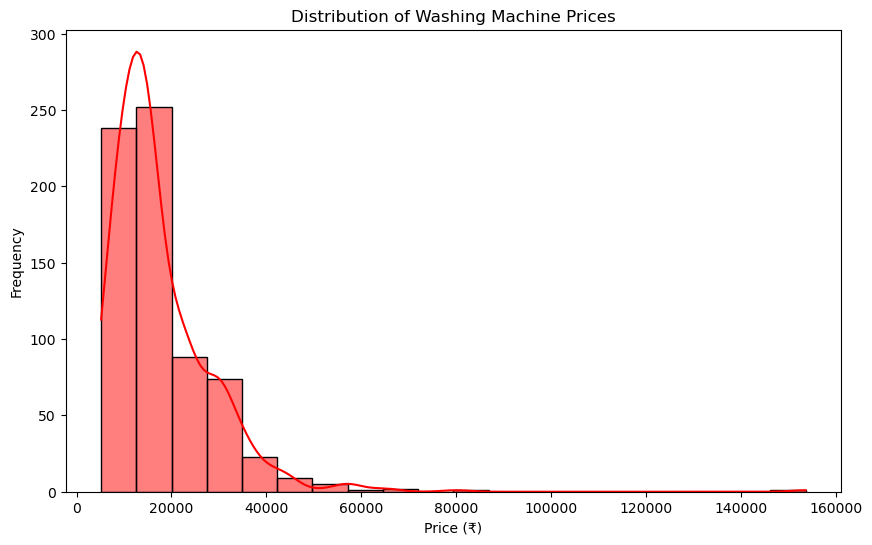

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df["Current_Price"], bins=20, kde=True, edgecolor="black",color = "red")

plt.title("Distribution of Washing Machine Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")

plt.show()


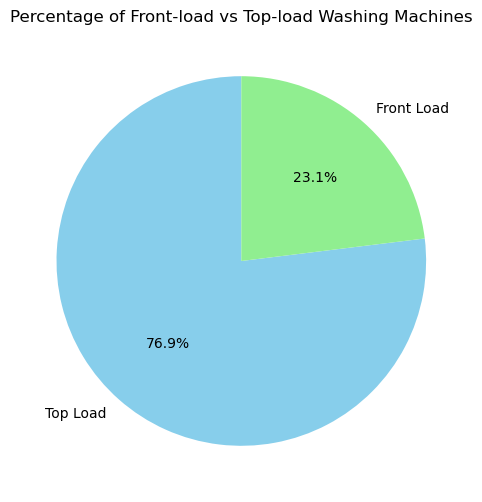

In [145]:
import matplotlib.pyplot as plt

# Count the occurrences of each load type
type_counts = df["Load_Type"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=["skyblue","lightgreen"])

plt.title("Percentage of Front-load vs Top-load Washing Machines")
plt.show()


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


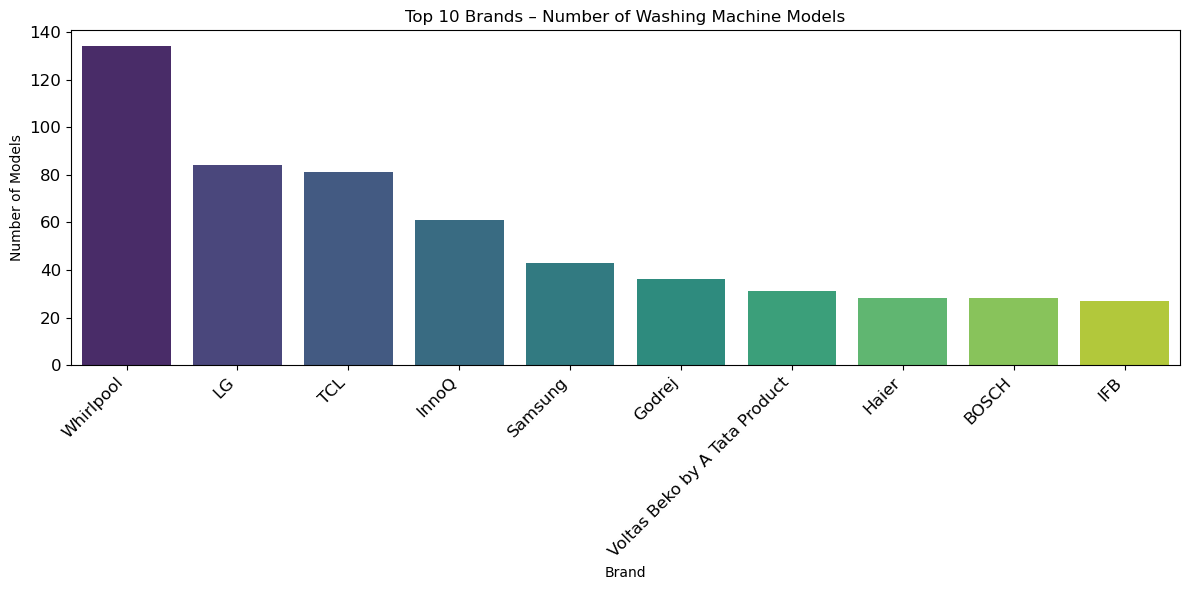

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 10 brands
top_brands = df["Brand"].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.countplot(
    x="Brand", 
    data=df[df["Brand"].isin(top_brands)], 
    order=top_brands, 
    palette="viridis"
)

plt.title("Top 10 Brands – Number of Washing Machine Models")
plt.xlabel("Brand")
plt.ylabel("Number of Models")

# Fix brand name alignment
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


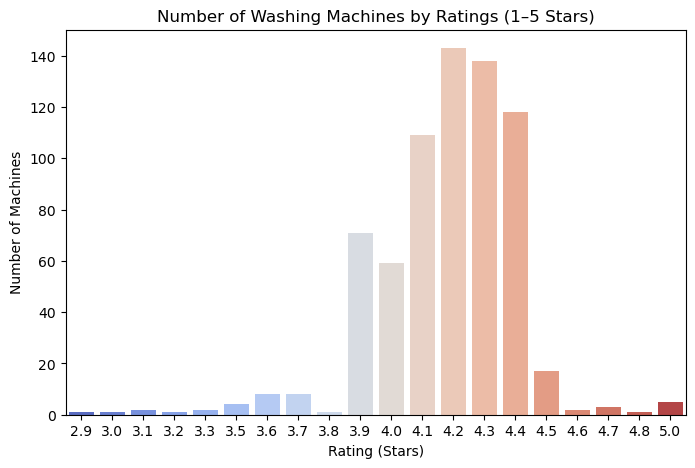

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x="Rating", data=df, order=sorted(df["Rating"].dropna().unique()), palette="coolwarm")

plt.title("Number of Washing Machines by Ratings (1–5 Stars)")
plt.xlabel("Rating (Stars)")
plt.ylabel("Number of Machines")

plt.show()


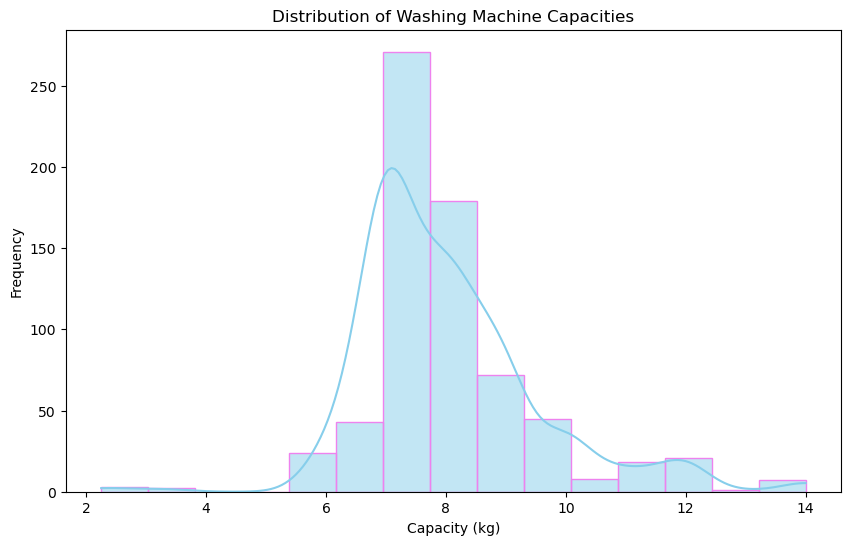

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df["Capacity"], bins=15, kde=True, edgecolor="violet", color="skyblue")

plt.title("Distribution of Washing Machine Capacities")
plt.xlabel("Capacity (kg)")
plt.ylabel("Frequency")

plt.show()


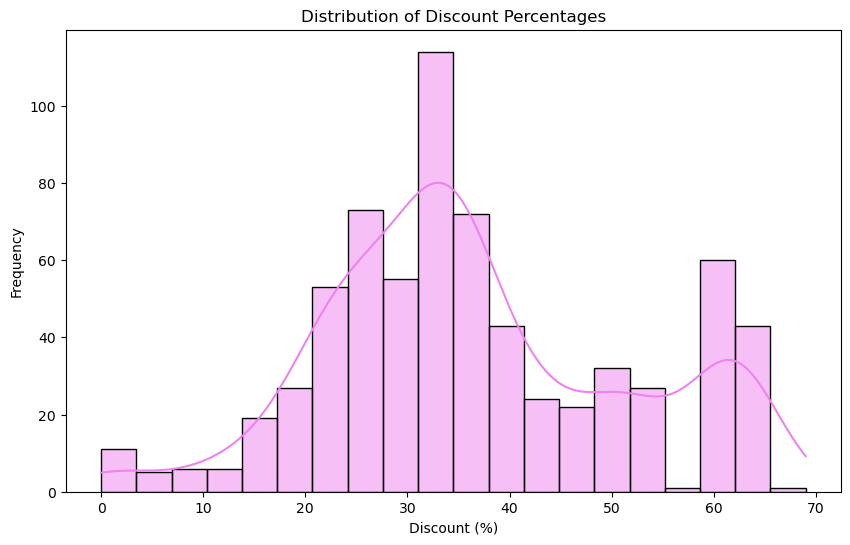

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df["Discount_Percent"], bins=20, kde=True, edgecolor="black", color="violet")

plt.title("Distribution of Discount Percentages")
plt.xlabel("Discount (%)")
plt.ylabel("Frequency")

plt.show()


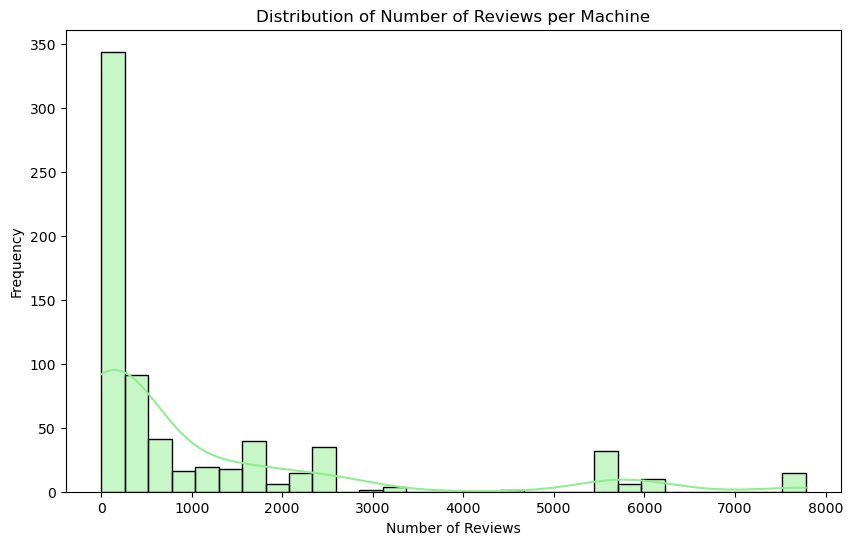

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df["No_of_Reviews"], bins=30, kde=True, color="lightgreen", edgecolor="black")

plt.title("Distribution of Number of Reviews per Machine")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")

plt.show()


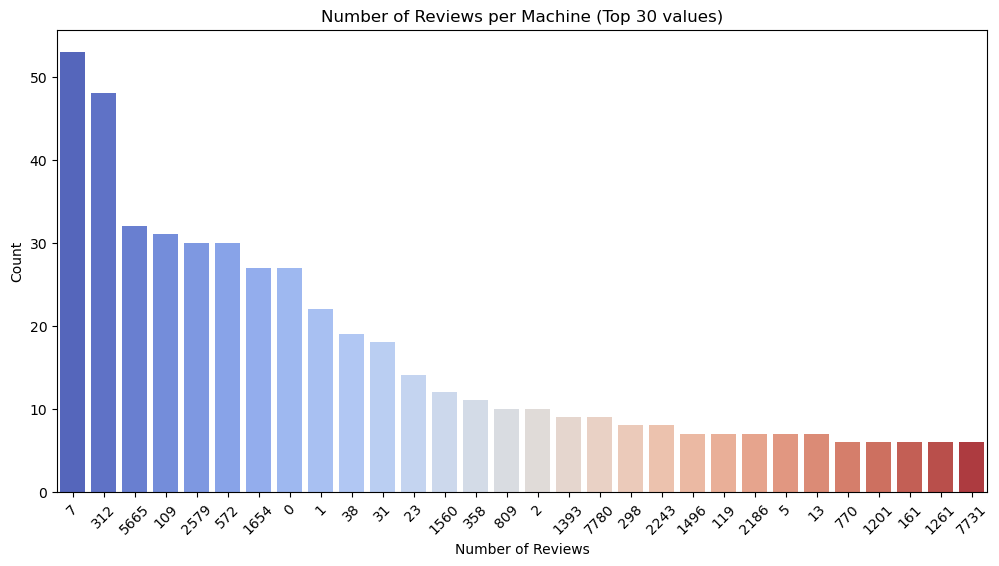

In [155]:
plt.figure(figsize=(12,6))
sns.countplot(x="No_of_Reviews", data=df, palette="coolwarm", order=df["No_of_Reviews"].value_counts().index[:30])

plt.title("Number of Reviews per Machine (Top 30 values)")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")

plt.xticks(rotation=45)
plt.show()


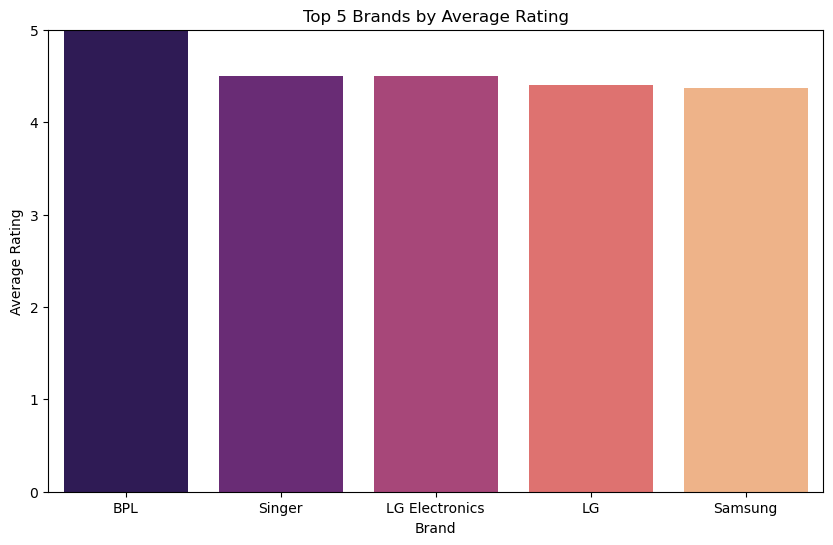

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average rating per brand
avg_ratings = df.groupby("Brand")["Rating"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="magma")

plt.title("Top 5 Brands by Average Rating")
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.ylim(0,5)  # Ratings are between 1 and 5
plt.show()


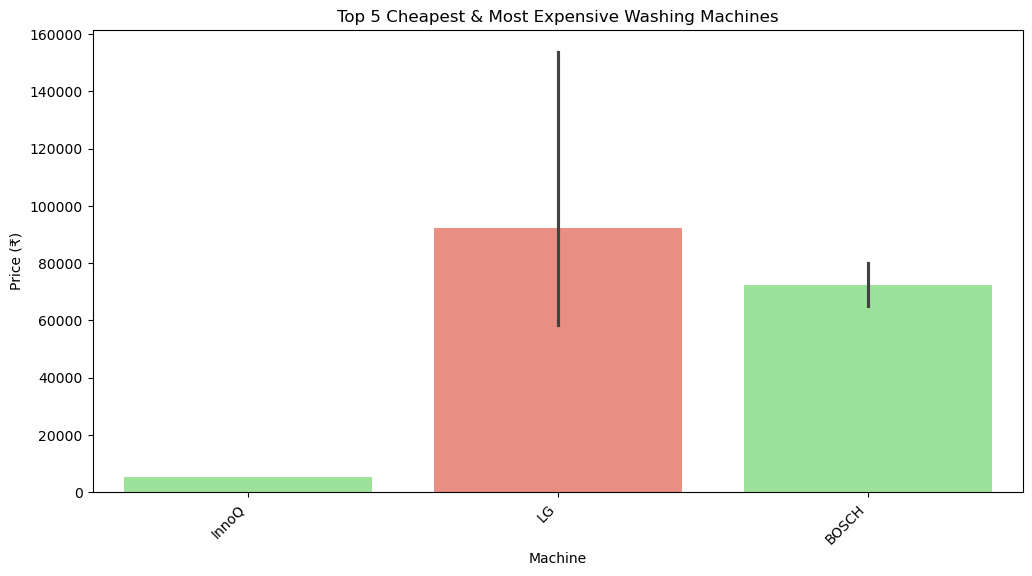

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 5 cheapest machines
cheapest = df.nsmallest(5, "Current_Price")[["Brand", "Current_Price"]]

# Top 5 most expensive machines
expensive = df.nlargest(5, "Current_Price")[["Brand", "Current_Price"]]

# Combine for plotting
top_prices = pd.concat([cheapest, expensive])

plt.figure(figsize=(12,6))
sns.barplot(x="Brand", y="Current_Price", data=top_prices, palette=["lightgreen"] + ["salmon"])

plt.title("Top 5 Cheapest & Most Expensive Washing Machines")
plt.xlabel("Machine")
plt.ylabel("Price (₹)")
plt.xticks(rotation=45, ha="right")

plt.show()


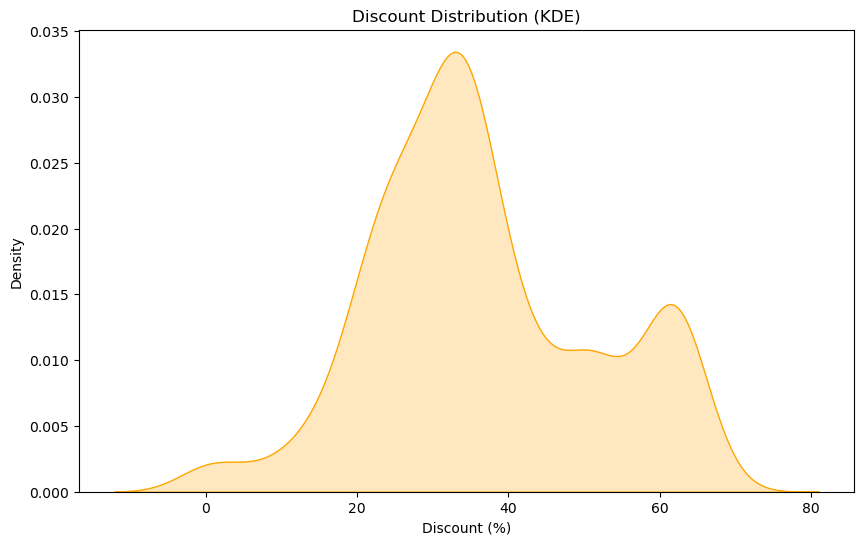

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(df["Discount_Percent"], shade=True, color="orange")

plt.title("Discount Distribution (KDE)")
plt.xlabel("Discount (%)")
plt.ylabel("Density")

plt.show()


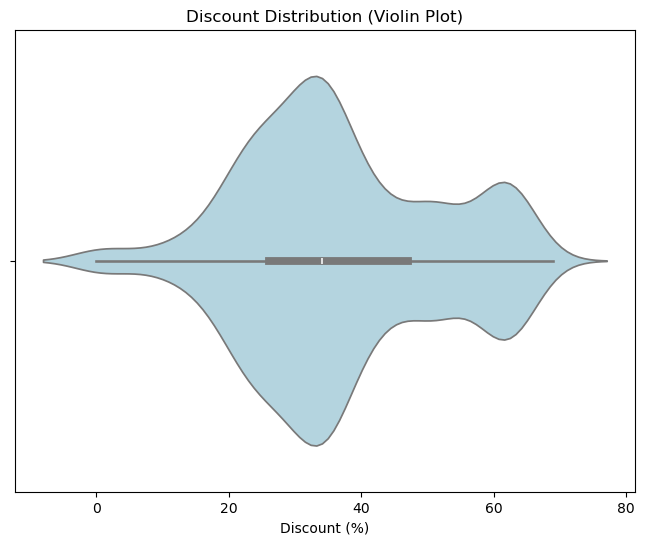

In [163]:
plt.figure(figsize=(8,6))
sns.violinplot(x=df["Discount_Percent"], color="lightblue")

plt.title("Discount Distribution (Violin Plot)")
plt.xlabel("Discount (%)")

plt.show()


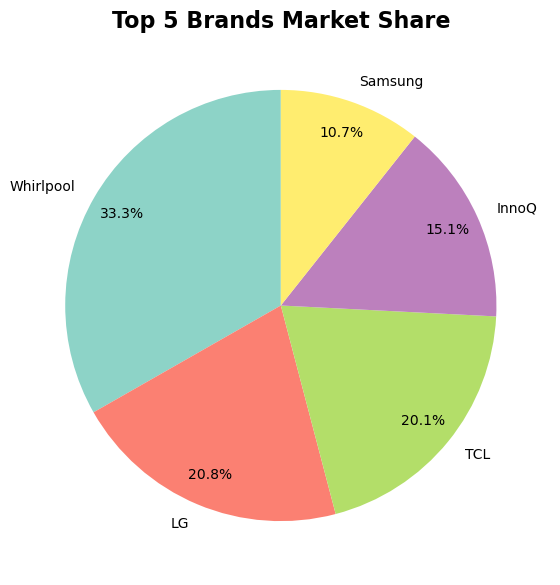

In [165]:
top5_counts = df['Brand'].value_counts().head(5)

plt.figure(figsize=(7,7))
top5_counts.plot.pie(
    autopct='%1.1f%%', startangle=90, cmap="Set3", pctdistance=0.85
)
plt.title("Top 5 Brands Market Share", fontsize=16, fontweight='bold')
plt.ylabel("")
plt.show()


# Bivariate

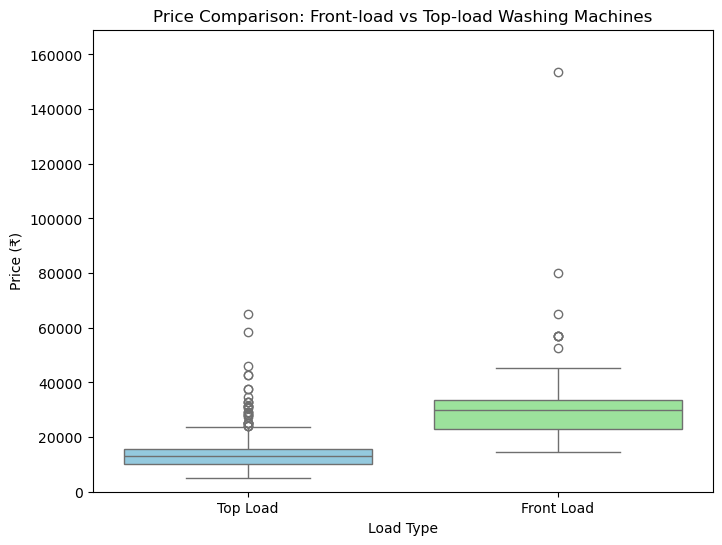

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x="Load_Type", y="Current_Price", data=df, palette=["skyblue","lightgreen"])

plt.title("Price Comparison: Front-load vs Top-load Washing Machines")
plt.xlabel("Load Type")
plt.ylabel("Price (₹)")
plt.ylim(0, df["Current_Price"].max()*1.1)  # Slightly extend y-axis for clarity

plt.show()


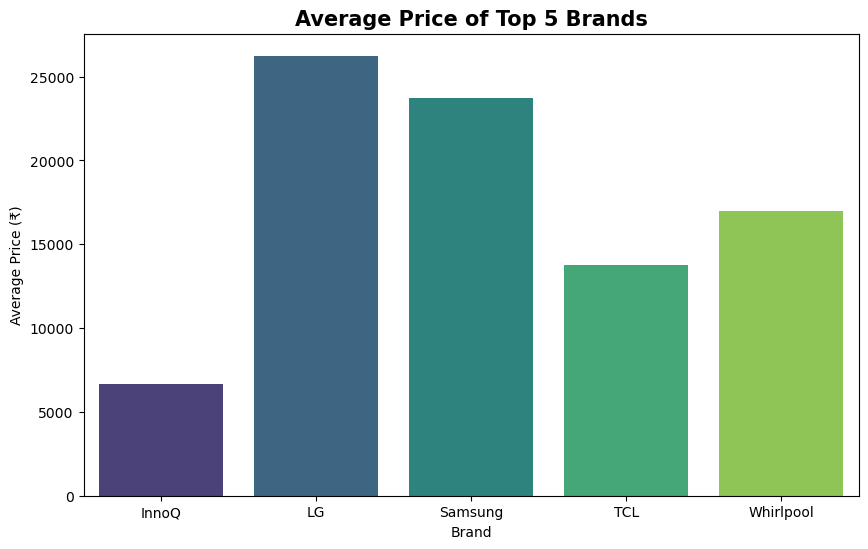

In [167]:
avg_price = df[df['Brand'].isin(top5_counts.index)].groupby("Brand")["Current_Price"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="Brand", y="Current_Price", data=avg_price, palette="viridis")
plt.title("Average Price of Top 5 Brands", fontsize=15, fontweight="bold")
plt.ylabel("Average Price (₹)")
plt.xlabel("Brand")
plt.show()


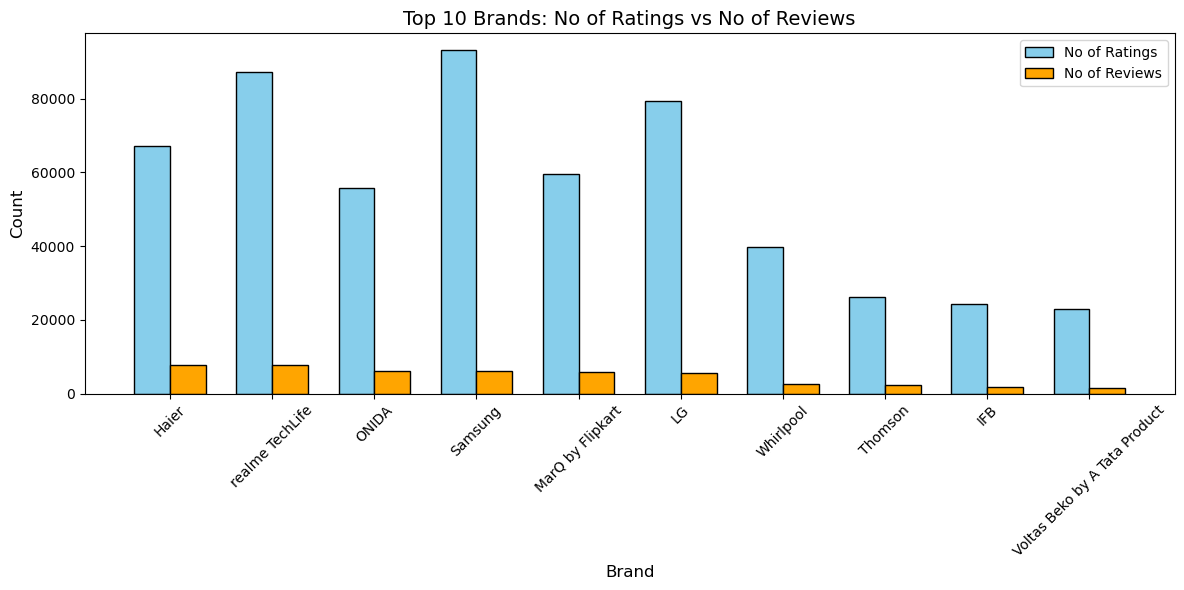

In [168]:
import matplotlib.pyplot as plt
import numpy as np

# Group by Brand and get max of Ratings and Reviews
brand_stats = df.groupby("Brand")[["No_of_Ratings", "No_of_Reviews"]].max().sort_values(by="No_of_Reviews", ascending=False).head(10)

# Set positions for bars
x = np.arange(len(brand_stats))
width = 0.35

# Plot grouped bar chart
plt.figure(figsize=(12,6))
plt.bar(x - width/2, brand_stats["No_of_Ratings"], width, label="No of Ratings", color="skyblue", edgecolor="black")
plt.bar(x + width/2, brand_stats["No_of_Reviews"], width, label="No of Reviews", color="orange", edgecolor="black")

# Labels and title
plt.xticks(x, brand_stats.index, rotation=45)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Top 10 Brands: No of Ratings vs No of Reviews", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


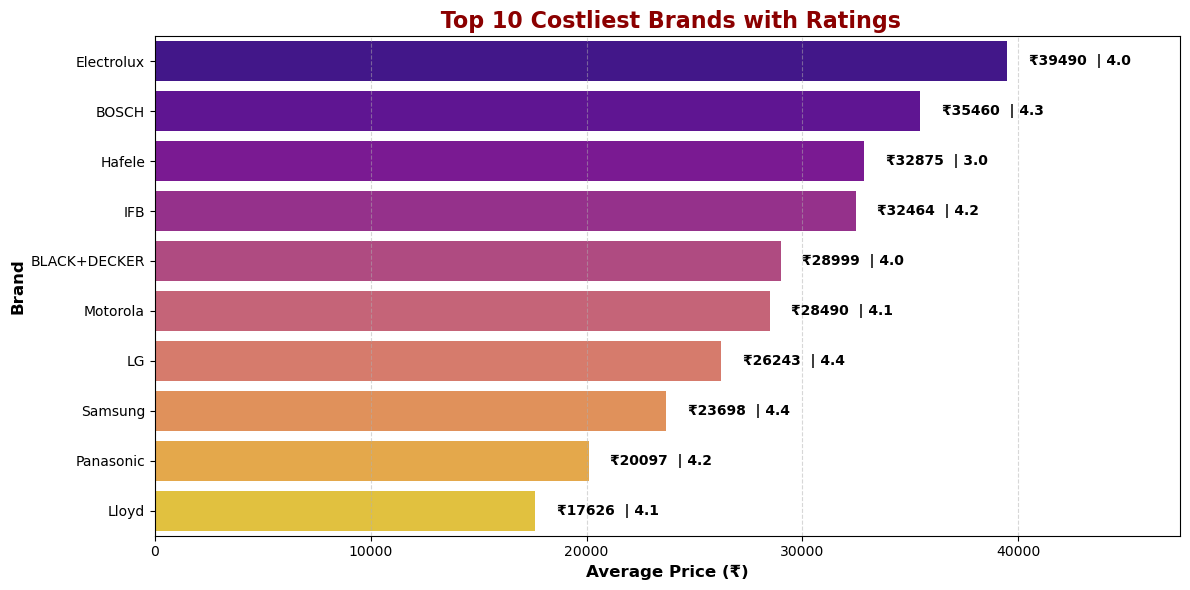

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove price = 0 and calculate average price & rating per brand
brand_stats = (
    df[df["Current_Price"] > 0]
    .groupby("Brand")[["Current_Price", "Rating"]]
    .mean()
    .sort_values("Current_Price", ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    x="Current_Price", 
    y="Brand", 
    data=brand_stats, 
    palette="plasma"
)

# Add labels BESIDE the bars
for index, (price, rating) in enumerate(zip(brand_stats["Current_Price"], brand_stats["Rating"])):
    plt.text(price + 1000, index,   # shifted to the right
             f"₹{int(price)}  | {rating:.1f}", 
             va="center", fontsize=10, fontweight="bold", color="black")

# Titles and labels
plt.title(" Top 10 Costliest Brands with Ratings", fontsize=16, fontweight="bold", color="darkred")
plt.xlabel("Average Price (₹)", fontsize=12, fontweight="bold")
plt.ylabel("Brand", fontsize=12, fontweight="bold")

# Extend x-axis so labels fit comfortably
plt.xlim(0, brand_stats["Current_Price"].max() + 8000)

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


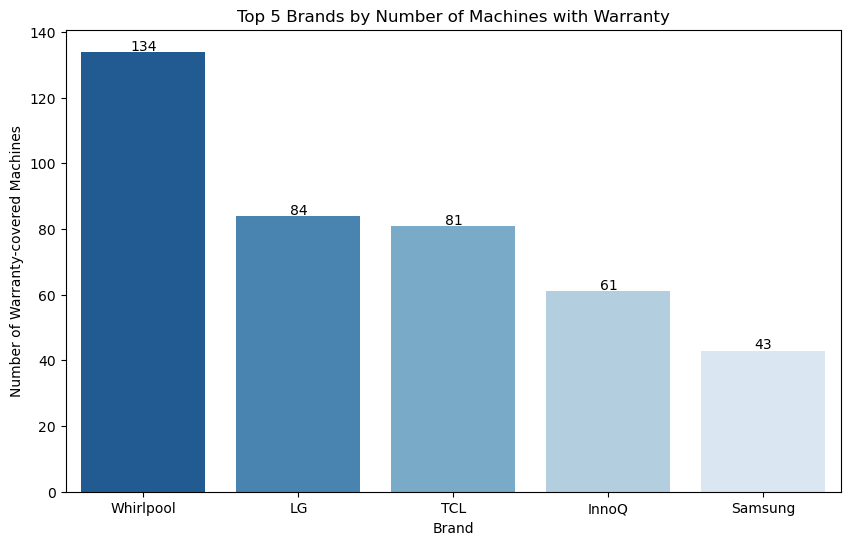

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of machines per brand with Warranty
warranty_counts = df[df["Warranty_on_Product"].notna()].groupby("Brand").size().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=warranty_counts.index, y=warranty_counts.values, palette="Blues_r")

plt.title("Top 5 Brands by Number of Machines with Warranty")
plt.xlabel("Brand")
plt.ylabel("Number of Warranty-covered Machines")

# Add exact counts on top of bars
for i, value in enumerate(warranty_counts.values):
    plt.text(i, value + 0.5, str(value), ha='center')

plt.show()


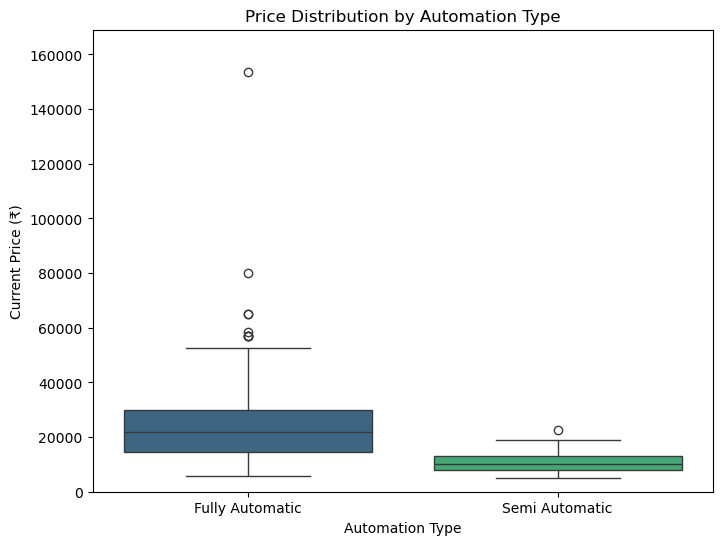

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x="Automation_Type", y="Current_Price", data=df, palette="viridis")

plt.title("Price Distribution by Automation Type")
plt.xlabel("Automation Type")
plt.ylabel("Current Price (₹)")
plt.ylim(0, df["Current_Price"].max()*1.1)  # extend y-axis slightly for clarity

plt.show()


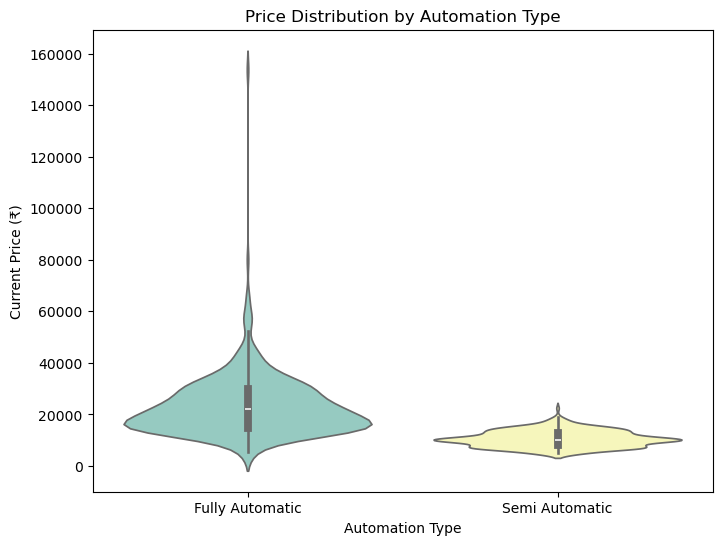

In [178]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Automation_Type", y="Current_Price", data=df, palette="Set3")
plt.title("Price Distribution by Automation Type")
plt.xlabel("Automation Type")
plt.ylabel("Current Price (₹)")
plt.show()


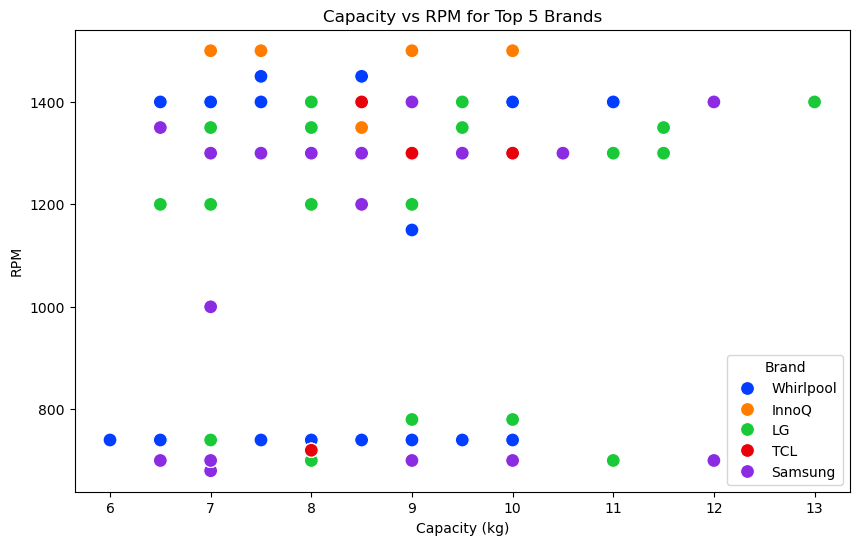

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 5 brands based on number of models
top_brands = df["Brand"].value_counts().head(5).index
top_brands_df = df[df["Brand"].isin(top_brands)]

plt.figure(figsize=(10,6))
sns.scatterplot(x="Capacity", y="RPM", hue="Brand", data=top_brands_df, s=100, palette="bright")

plt.title("Capacity vs RPM for Top 5 Brands")
plt.xlabel("Capacity (kg)")
plt.ylabel("RPM")
plt.legend(title="Brand")
plt.show()


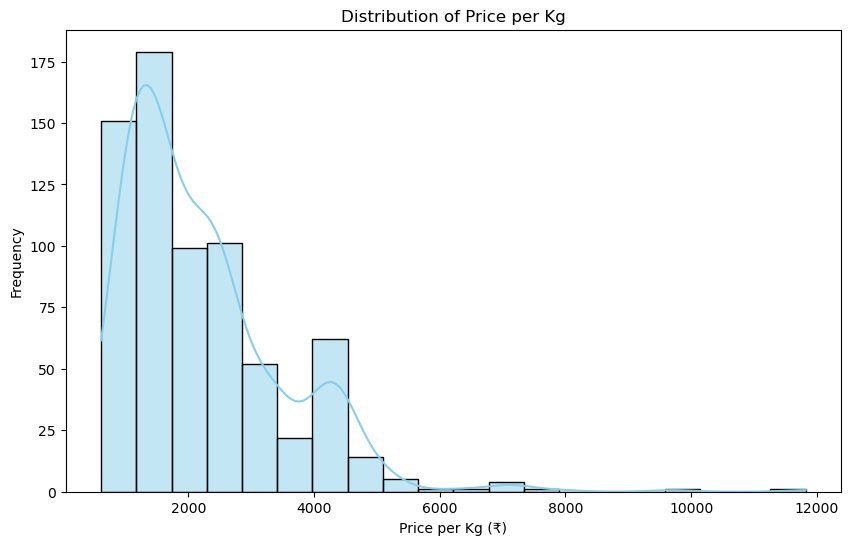

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df["Price_per_KG"], bins=20, kde=True, color="skyblue", edgecolor="black")

plt.title("Distribution of Price per Kg")
plt.xlabel("Price per Kg (₹)")
plt.ylabel("Frequency")

plt.show()


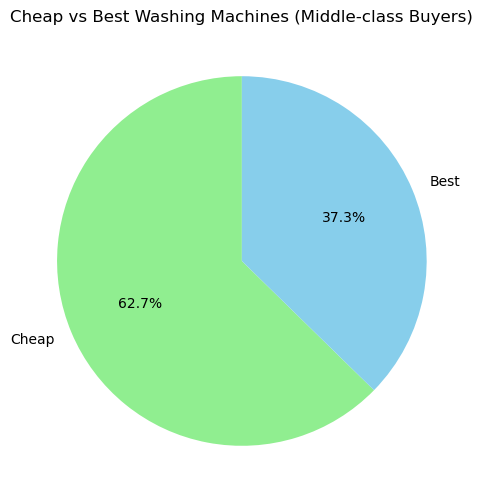

In [191]:
import matplotlib.pyplot as plt

# Filter machines affordable for middle class (example: <= 30,000)
middle_class_df = df[df["Current_Price"] <= 30000]

# Define categories
conditions = [
    (middle_class_df["Current_Price"] < 15000),
    (middle_class_df["Current_Price"] >= 15000)
]
choices = ["Cheap", "Best"]
middle_class_df["Category"] = np.select(conditions, choices)

# Count for pie chart
category_counts = middle_class_df["Category"].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightgreen", "skyblue"])
plt.title("Cheap vs Best Washing Machines (Middle-class Buyers)")
plt.show()


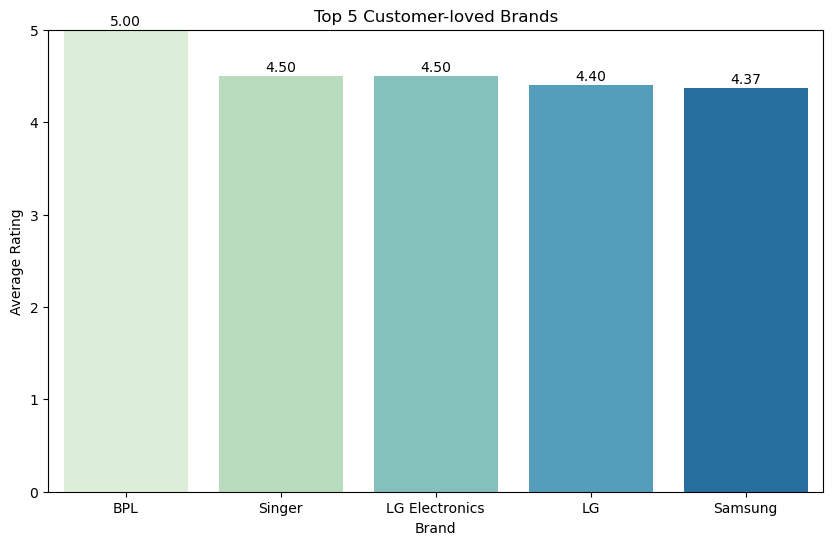

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average rating per brand
avg_rating = df.groupby("Brand")["Rating"].mean().sort_values(ascending=False).head(5)

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette="GnBu")

plt.title("Top 5 Customer-loved Brands")
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.ylim(0,5)  # Ratings are between 1 and 5

# Add exact rating values on top of bars
for i, value in enumerate(avg_rating.values):
    plt.text(i, value + 0.05, f"{value:.2f}", ha='center')

plt.show()


In [195]:
df

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,RPM,Warranty_on_Product,No_of_Ratings,No_of_Reviews,Discount_Percent,Price_per_KG,Score
0,Whirlpool 7 kg Magic Clean 5 Star Fully Automa...,Whirlpool,7.00,Fully Automatic,Top Load,14490,19550,4.1,740,2,39864,2579,25,2070.00,10573.9
1,InnoQ 7.5 kg | Turbo Wash | Buzzer | Wheels | ...,InnoQ,7.50,Semi Automatic,Top Load,6989,18990,4.2,1500,1,2371,312,63,931.87,1310.4
2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,realme TechLife,7.50,Semi Automatic,Top Load,8090,13990,4.2,1400,2,87253,7731,42,1078.67,32470.2
3,Thomson 7.5 kg 5 Star Aqua Magic Semi Automati...,Thomson,7.50,Semi Automatic,Top Load,7490,11499,4.1,1400,2,26163,2243,34,998.67,9196.3
4,"LG 7 kg 5 Star with Wind Jet Dry, Collar Scrub...",LG,7.00,Semi Automatic,Top Load,10490,16390,4.5,1350,2,47022,2945,35,1498.57,13252.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,Whirlpool 6 kg Magic Clean 5 Star and Digital ...,Whirlpool,6.00,Fully Automatic,Top Load,14450,18200,4.2,740,2,24354,1654,20,2408.33,6946.8
690,CANDY 7 kg Semi Automatic Top Load Washing Mac...,CANDY,7.00,Semi Automatic,Top Load,8890,11590,4.2,1300,2,823,89,23,1270.00,373.8
691,"IFB 8 kg Powered by AI, 5 Star,� with 2x Steam...",IFB,8.00,Fully Automatic,Front Load,39350,50690,4.4,1400,4,1982,201,22,4918.75,884.4
692,Samsung 10 kg with Wi-Fi Enabled Fully Automat...,Samsung,10.00,Fully Automatic,Top Load,31538,37000,4.3,700,2,24714,1975,14,3153.80,8492.5


In [198]:
df.drop(columns=["Score"], inplace=True)

In [199]:
df

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,RPM,Warranty_on_Product,No_of_Ratings,No_of_Reviews,Discount_Percent,Price_per_KG
0,Whirlpool 7 kg Magic Clean 5 Star Fully Automa...,Whirlpool,7.00,Fully Automatic,Top Load,14490,19550,4.1,740,2,39864,2579,25,2070.00
1,InnoQ 7.5 kg | Turbo Wash | Buzzer | Wheels | ...,InnoQ,7.50,Semi Automatic,Top Load,6989,18990,4.2,1500,1,2371,312,63,931.87
2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,realme TechLife,7.50,Semi Automatic,Top Load,8090,13990,4.2,1400,2,87253,7731,42,1078.67
3,Thomson 7.5 kg 5 Star Aqua Magic Semi Automati...,Thomson,7.50,Semi Automatic,Top Load,7490,11499,4.1,1400,2,26163,2243,34,998.67
4,"LG 7 kg 5 Star with Wind Jet Dry, Collar Scrub...",LG,7.00,Semi Automatic,Top Load,10490,16390,4.5,1350,2,47022,2945,35,1498.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,Whirlpool 6 kg Magic Clean 5 Star and Digital ...,Whirlpool,6.00,Fully Automatic,Top Load,14450,18200,4.2,740,2,24354,1654,20,2408.33
690,CANDY 7 kg Semi Automatic Top Load Washing Mac...,CANDY,7.00,Semi Automatic,Top Load,8890,11590,4.2,1300,2,823,89,23,1270.00
691,"IFB 8 kg Powered by AI, 5 Star,� with 2x Steam...",IFB,8.00,Fully Automatic,Front Load,39350,50690,4.4,1400,4,1982,201,22,4918.75
692,Samsung 10 kg with Wi-Fi Enabled Fully Automat...,Samsung,10.00,Fully Automatic,Top Load,31538,37000,4.3,700,2,24714,1975,14,3153.80


In [200]:
df.drop(columns=["Price_per_KG"], inplace=True)

In [201]:
df

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,RPM,Warranty_on_Product,No_of_Ratings,No_of_Reviews,Discount_Percent
0,Whirlpool 7 kg Magic Clean 5 Star Fully Automa...,Whirlpool,7.00,Fully Automatic,Top Load,14490,19550,4.1,740,2,39864,2579,25
1,InnoQ 7.5 kg | Turbo Wash | Buzzer | Wheels | ...,InnoQ,7.50,Semi Automatic,Top Load,6989,18990,4.2,1500,1,2371,312,63
2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,realme TechLife,7.50,Semi Automatic,Top Load,8090,13990,4.2,1400,2,87253,7731,42
3,Thomson 7.5 kg 5 Star Aqua Magic Semi Automati...,Thomson,7.50,Semi Automatic,Top Load,7490,11499,4.1,1400,2,26163,2243,34
4,"LG 7 kg 5 Star with Wind Jet Dry, Collar Scrub...",LG,7.00,Semi Automatic,Top Load,10490,16390,4.5,1350,2,47022,2945,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,Whirlpool 6 kg Magic Clean 5 Star and Digital ...,Whirlpool,6.00,Fully Automatic,Top Load,14450,18200,4.2,740,2,24354,1654,20
690,CANDY 7 kg Semi Automatic Top Load Washing Mac...,CANDY,7.00,Semi Automatic,Top Load,8890,11590,4.2,1300,2,823,89,23
691,"IFB 8 kg Powered by AI, 5 Star,� with 2x Steam...",IFB,8.00,Fully Automatic,Front Load,39350,50690,4.4,1400,4,1982,201,22
692,Samsung 10 kg with Wi-Fi Enabled Fully Automat...,Samsung,10.00,Fully Automatic,Top Load,31538,37000,4.3,700,2,24714,1975,14


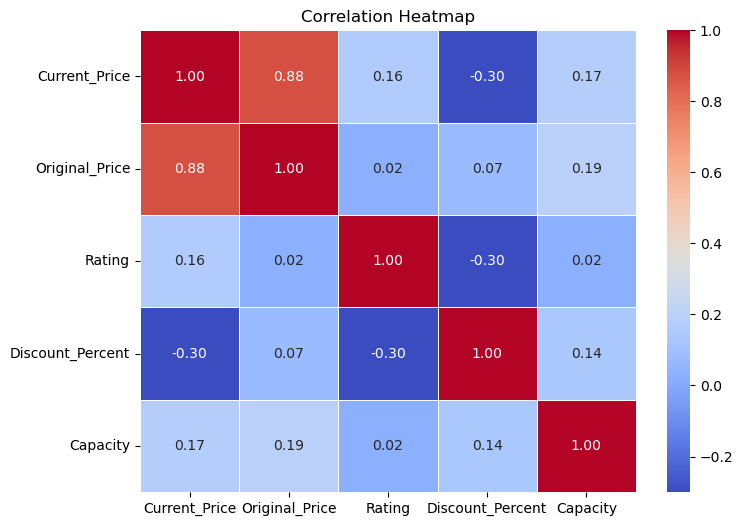

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numeric columns
cols = ["Current_Price", "Original_Price", "Rating",  "Discount_Percent", "Capacity"]
corr_matrix = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()


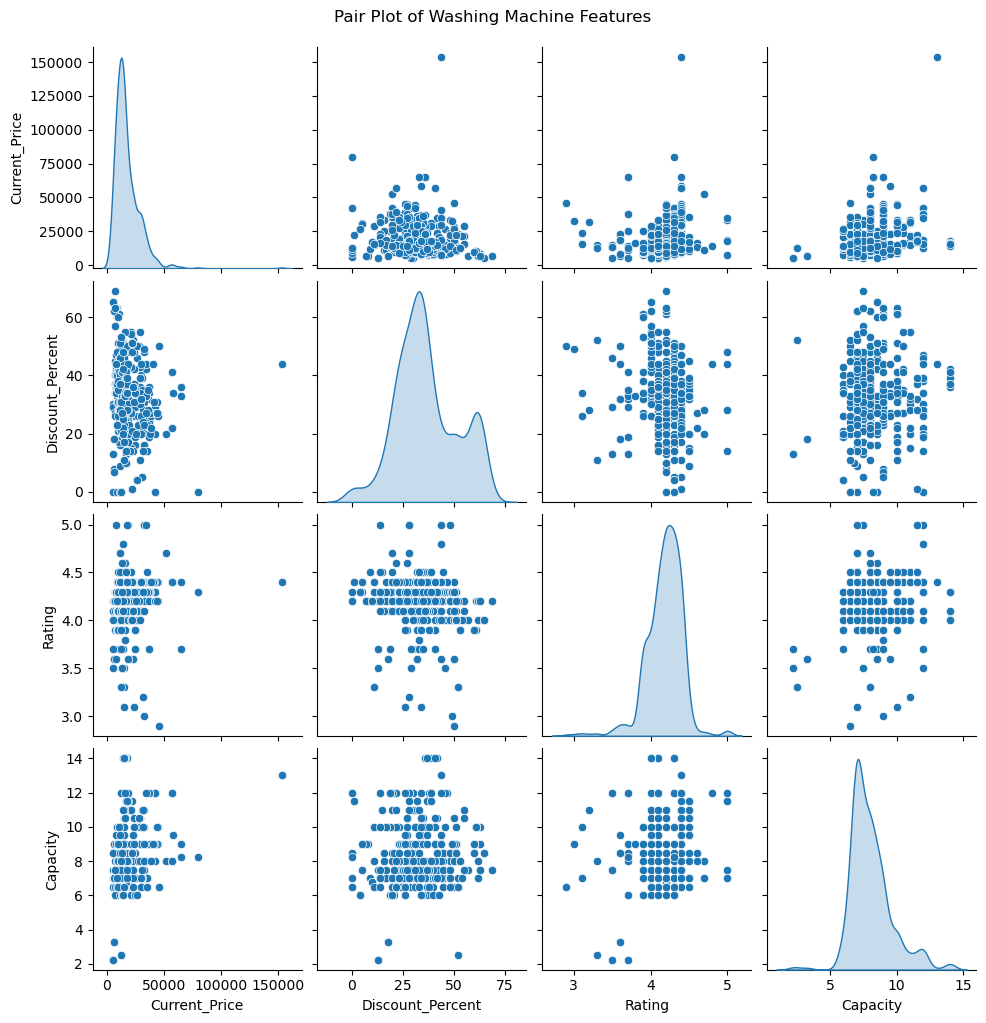

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for pairplot
cols = ["Current_Price", "Discount_Percent", "Rating", "Capacity"]

# Pair plot
sns.pairplot(df[cols], diag_kind="kde", palette="husl")

plt.suptitle("Pair Plot of Washing Machine Features", y=1.02)
plt.show()


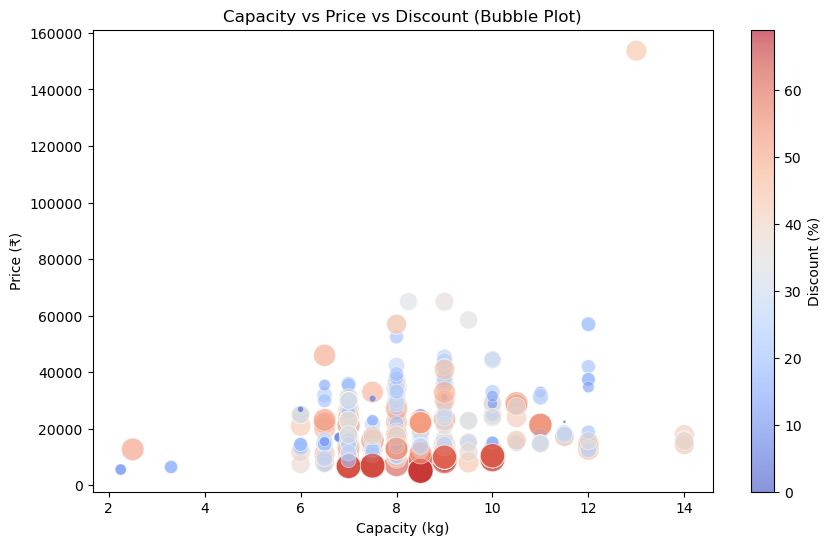

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Bubble plot: Capacity vs Price with Discount as size
plt.scatter(
    df["Capacity"], 
    df["Current_Price"], 
    s=df["Discount_Percent"]*5,   # scale bubble size
    alpha=0.6, 
    c=df["Discount_Percent"],     # color by discount
    cmap="coolwarm", 
    edgecolors="w", 
    linewidth=0.5
)

plt.title("Capacity vs Price vs Discount (Bubble Plot)")
plt.xlabel("Capacity (kg)")
plt.ylabel("Price (₹)")
plt.colorbar(label="Discount (%)")

plt.show()


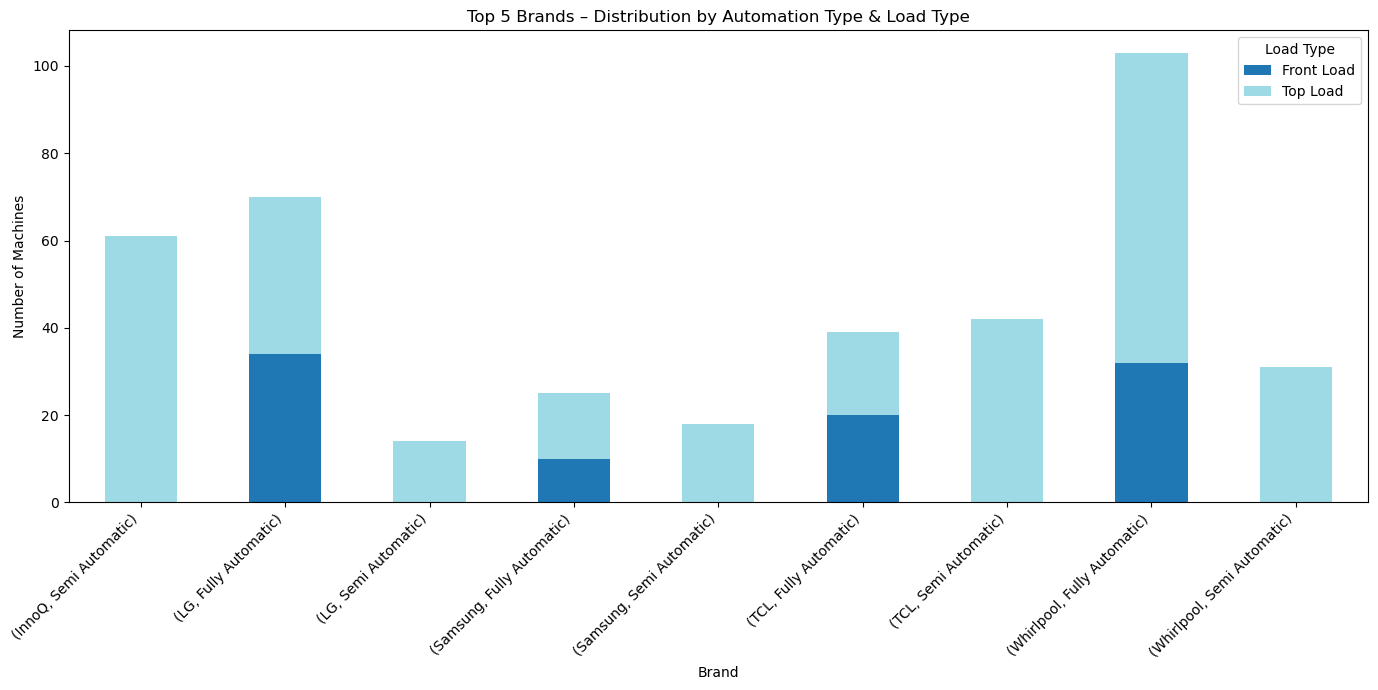

In [23]:
import matplotlib.pyplot as plt

# Get top 10 brands
top10_brands = df["Brand"].value_counts().head(5).index

# Group by brand, automation, and load type
brand_auto_load = (
    df[df["Brand"].isin(top10_brands)]
    .groupby(["Brand", "Automation_Type", "Load_Type"])
    .size()
    .unstack(fill_value=0)
)

# Plot stacked bar chart
brand_auto_load.plot(kind="bar", stacked=True, figsize=(14,7), colormap="tab20")

plt.title("Top 5 Brands – Distribution by Automation Type & Load Type")
plt.xlabel("Brand")
plt.ylabel("Number of Machines")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Load Type")
plt.tight_layout()
plt.show()


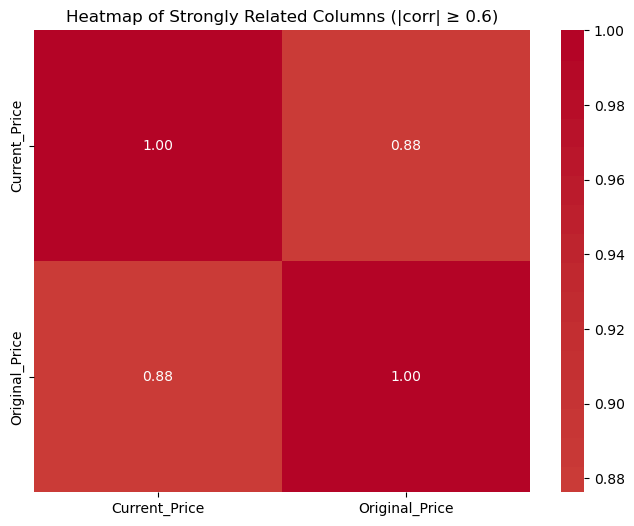

Strongly related column pairs:
         Var1           Var2  Correlation
Current_Price Original_Price     0.876289


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# numeric columns
numeric_cols = [
    "Capacity",
    "Current_Price",
    "Original_Price",
    "Rating",
    "RPM",
    "Warranty_on_Product",
    "Discount_Percent"
]

# correlation matrix
corr = df[numeric_cols].corr()

# take upper triangle (to avoid duplicates)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# select strong correlations (absolute value >= 0.6)
strong_pairs = (
    upper.stack()
    .reset_index()
    .rename(columns={"level_0":"Var1","level_1":"Var2",0:"Correlation"})
)
strong_pairs = strong_pairs[strong_pairs["Correlation"].abs() >= 0.6]

# get unique columns involved
strong_cols = pd.unique(strong_pairs[["Var1","Var2"]].values.ravel())

# plot heatmap only for strong relationship columns
plt.figure(figsize=(8,6))
sns.heatmap(df[strong_cols].corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Heatmap of Strongly Related Columns (|corr| ≥ 0.6)")
plt.show()

# print the pairs once
print("Strongly related column pairs:")
print(strong_pairs.to_string(index=False))


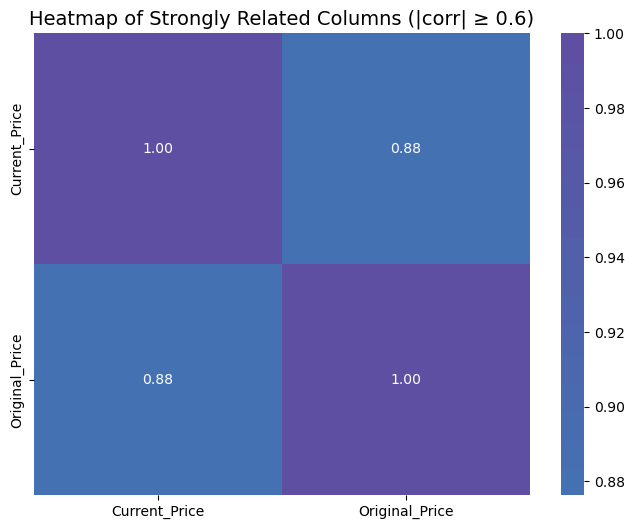

Strongly related column pairs:
         Var1           Var2  Correlation
Current_Price Original_Price     0.876289


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# numeric columns
numeric_cols = [
    "Capacity",
    "Current_Price",
    "Original_Price",
    "Rating",
    "RPM",
    "Warranty_on_Product",
    "Discount_Percent"
]

# correlation matrix
corr = df[numeric_cols].corr()

# take upper triangle (to avoid duplicates)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# select strong correlations (absolute value >= 0.6)
strong_pairs = (
    upper.stack()
    .reset_index()
    .rename(columns={"level_0":"Var1","level_1":"Var2",0:"Correlation"})
)
strong_pairs = strong_pairs[strong_pairs["Correlation"].abs() >= 0.6]

# get unique columns involved
strong_cols = pd.unique(strong_pairs[["Var1","Var2"]].values.ravel())

# plot heatmap only for strong relationship columns
plt.figure(figsize=(8,6))
sns.heatmap(df[strong_cols].corr(), annot=True, cmap="Spectral", center=0, fmt=".2f")
plt.title("Heatmap of Strongly Related Columns (|corr| ≥ 0.6)", fontsize=14)
plt.show()

# print the pairs once
print("Strongly related column pairs:")
print(strong_pairs.to_string(index=False))


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                694 non-null    object 
 1   Brand                694 non-null    object 
 2   Capacity             694 non-null    float64
 3   Automation_Type      694 non-null    object 
 4   Load_Type            694 non-null    object 
 5   Current_Price        694 non-null    int64  
 6   Original_Price       694 non-null    int64  
 7   Rating               694 non-null    float64
 8   RPM                  694 non-null    int64  
 9   Warranty_on_Product  694 non-null    int64  
 10  No_of_Ratings        694 non-null    int64  
 11  No_of_Reviews        694 non-null    int64  
 12  Discount_Percent     694 non-null    int64  
 13  Price_per_KG         694 non-null    float64
dtypes: float64(3), int64(7), object(4)
memory usage: 76.0+ KB


In [3]:
df

,Title,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Rating,RPM,Warranty_on_Product,No_of_Ratings,No_of_Reviews,Discount_Percent,Price_per_KG
0,Whirlpool 7 kg Magic Clean 5 Star Fully Automa...,Whirlpool,7.00,Fully Automatic,Top Load,14490,19550,4.1,740,2,39864,2579,25,2070.00
1,InnoQ 7.5 kg | Turbo Wash | Buzzer | Wheels | ...,InnoQ,7.50,Semi Automatic,Top Load,6989,18990,4.2,1500,1,2371,312,63,931.87
2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,realme TechLife,7.50,Semi Automatic,Top Load,8090,13990,4.2,1400,2,87253,7731,42,1078.67
3,Thomson 7.5 kg 5 Star Aqua Magic Semi Automati...,Thomson,7.50,Semi Automatic,Top Load,7490,11499,4.1,1400,2,26163,2243,34,998.67
4,"LG 7 kg 5 Star with Wind Jet Dry, Collar Scrub...",LG,7.00,Semi Automatic,Top Load,10490,16390,4.5,1350,2,47022,2945,35,1498.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,Whirlpool 6 kg Magic Clean 5 Star and Digital ...,Whirlpool,6.00,Fully Automatic,Top Load,14450,18200,4.2,740,2,24354,1654,20,2408.33
690,CANDY 7 kg Semi Automatic Top Load Washing Mac...,CANDY,7.00,Semi Automatic,Top Load,8890,11590,4.2,1300,2,823,89,23,1270.00
691,"IFB 8 kg Powered by AI, 5 Star,� with 2x Steam...",IFB,8.00,Fully Automatic,Front Load,39350,50690,4.4,1400,4,1982,201,22,4918.75
692,Samsung 10 kg with Wi-Fi Enabled Fully Automat...,Samsung,10.00,Fully Automatic,Top Load,31538,37000,4.3,700,2,24714,1975,14,3153.80
